# **Projet UA 2 – Prédiction des matchs de football**: 

## **Introduction**: 

### **Contexte**: 

Dans ce projet, nous devons créer des modèles d’IA dans le but de prédire le résultat de matchs de football (soccer) de deux équipes. Ce projet comporte deux facettes : 1. la soumission d’un Jupyter notebook à remettrez sur eCité dans lequel nous fournirons notre analyse des données ainsi que notre code et 2. une compétion Kaggle, dans laquelle nous tenterons de battre les scores de nos camarades de classe.


### **Instructions**

football.csv - Le fichier a utiliser pour entraîner nos modèles

competition.csv - Le fichier de compétition que nous devons prédire avec notre modèle entraîné.

exemple_soumission.csv - Un exemple du format de fichier que nous devons soumettre sur Kaggle

Confert document d'instructions pour les instructions détaillées

### Colonnes

Note : X dans le nom de la caractéristique est soit home ou away, indiquant si la caractéristique est pour l’équipe à domicile ou l’équipe extérieure.

•
'id': Identifiant unique.

•
'date': La date où le match a eu lieu.

•
'X_team': Le nom de l’équipe.

•
'rank_change_X': Le changement au classement FIFA pour l'équipe entre la période de classement actuelle et la période de classement précédente. Les valeurs négatives indiquent une baisse du classement, tandis que les valeurs positives indiquent une amélioration.

•
'X_goals_mean': Nombre moyen de buts marqués par l'équipe dans tous les matchs précédents.

•
'X_goals_mean_l5': Nombre moyen de buts marqués par l'équipe dans les 5 derniers matchs.

•
'X_goals_suf_mean': Moyenne des buts subis par l'équipe dans tous les matchs précédents.

•
'X_goals_suf_mean_l5': Moyenne des buts subis par l'équipe dans les 5 derniers matchs.

•
'X_rank_mean': Classement FIFA moyen de l'équipe lors de tous les matchs précédents.

•
'X_rank_mean_l5': Classement FIFA moyen de l'équipe lors des 5 derniers matchs.

•
'X_points_mean': Moyenne des points obtenus par l'équipe à domicile/à l'extérieur (victoire=3, match nul=1, défaite=0) dans tous les matchs prédécents.

•
'X_points_mean_l5': Moyenne des points obtenus par l'équipe à domicile/à l'extérieur (victoire=3, match nul=1, défaite=0) dans les 5 derniers matchs.
•

'match_type: Si le match est un tournoi amical (friendly) ou un match de compétition (competition).
•

'target': Le résultat du match. 1 pour une victoire, 0 pour une défaite ou un match nul.

## Les Pré-travaux

In [1]:
import pandas as pd
## Pour une affiche plus large de certaines sorties
# Augmenter la largeur d'affichage pour voir toutes les colonnes
pd.set_option('display.max_columns', None)

# Augmenter le nombre de lignes affichées
pd.set_option('display.max_rows', None)

# Désactiver la coupure du texte
pd.set_option('display.max_colwidth', None)

# Partie 1 - Analyse exploratoire des données

## I - Compréhension des données

Nous allons en premier lieu charger les données et nous assurer de comprendre ce qu'elles représentent. 

In [2]:
import pandas as pd

df = pd.read_csv('football.csv')



In [3]:
df.shape

(3777, 24)

Nous avons un jeu de données de 23 caractéristiques, et de 3777 échantillons. 

Analysons les colomnes que nous avons 

In [4]:
df.columns

Index(['id', 'date', 'home_team', 'away_team', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'target', 'match_type'],
      dtype='object')

### Les caractéristiques particulières
Ciblons les caractéristiques qui présentent des données suspectes pour une étude approfondie.

Nous allons d'abord, nous baser sur la différence entre la médiane et la moyenne, ensuite la vérification des quartiles pour iidentifier les caractéristiques que nous pouvons étudier en profondeur.

In [5]:
df.describe()

,id,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target
count,3777.000000,3777.000000,1735.000000,3777.000000,3777.000000,3753.000000,3777.000000,3777.000000,3777.000000,3763.000000,3777.000000,3777.000000,3777.000000,3760.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000
mean,2355.448239,0.079958,0.042651,1.363972,1.356985,1.250658,1.290778,85.690572,84.750613,20.283917,1.424337,1.305654,1.303954,1.320218,1.343800,88.096724,87.014606,10.293439,0.740582,0.523167
std,1350.540070,4.990718,2.428546,0.605170,0.834692,0.683486,0.867303,36.061328,40.272798,62.542519,17.099149,0.601565,0.818420,0.737387,0.907621,36.338822,40.854255,57.171734,16.789257,0.499529
min,0.000000,-28.000000,-24.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-166.940000,-72.040000,0.000000,0.000000,0.000000,0.000000,4.750000,4.750000,-170.340000,-72.040000,0.000000
25%,1190.000000,-1.000000,-1.000000,1.000000,0.800000,0.857143,0.800000,55.818182,54.800000,-16.000000,-7.400000,0.923077,0.800000,0.910308,0.800000,58.964286,56.600000,-21.890000,-8.120000,0.000000
50%,2362.000000,0.000000,0.000000,1.285714,1.200000,1.125000,1.200000,85.842105,81.800000,7.000000,0.000000,1.212121,1.200000,1.181818,1.200000,88.583333,84.000000,2.000000,0.000000,1.000000
75%,3517.000000,1.000000,1.000000,1.704545,1.800000,1.500000,1.600000,104.707317,110.600000,49.960000,9.130000,1.625000,1.800000,1.576923,1.800000,107.333333,114.200000,37.570000,8.710000,1.000000
max,4721.000000,188.000000,14.000000,6.000000,6.400000,11.000000,11.000000,201.000000,206.200000,287.290000,138.000000,6.000000,6.000000,9.500000,9.500000,210.000000,210.000000,287.290000,140.000000,1.000000


In [6]:
df.describe().columns.values

array(['id', 'rank_change_home', 'rank_change_away', 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'target'], dtype=object)

In [8]:
import numpy as np
df.describe()
list_champs_suspects=np.array(['rank_change_home', 'home_rank_mean_l5',  'home_points_mean','home_points_mean_l5', 'away_points_mean', 'away_points_mean_l5'])

Après analyse de base grace à Describe en régardant les valeurs de la moyenne, médiane et le quartile (0.75) et le max, les colomnes suivantes: 'rank_change_home', 'home_rank_mean_l5',  'home_points_mean','home_points_mean_l5', 'away_points_mean', 'away_points_mean_l5' semblent présenter des anomalies très palpables peut être des données manquantes ou des données abérrantes.  Elles seront donc analysées davantage. 

In [9]:
df[list_champs_suspects].isna().sum()


rank_change_home        0
home_rank_mean_l5       0
home_points_mean       14
home_points_mean_l5     0
away_points_mean        0
away_points_mean_l5     0
dtype: int64

Parmis ces caractéristiques , seul home_points_mean présente juste 14 valeurs manquantes sur les 3777 données ce qui ne représente pas une grande majorité pour impacté la distribution ou la dispersion des données 

rank_change_home
 count    3777.000000
mean        0.079958
std         4.990718
min       -28.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max       188.000000
Name: rank_change_home, dtype: float64


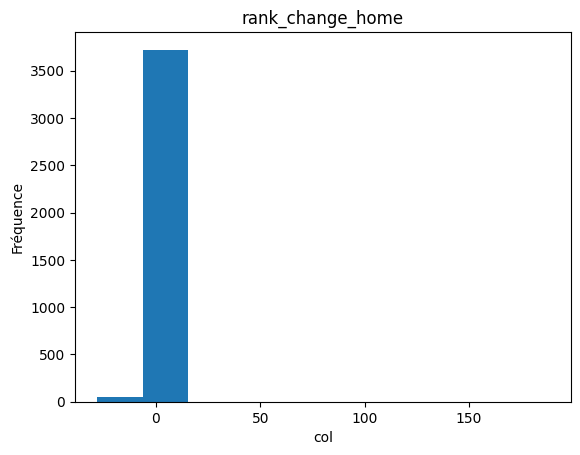


home_rank_mean_l5
 count    3777.000000
mean       84.750613
std        40.272798
min         1.000000
25%        54.800000
50%        81.800000
75%       110.600000
max       206.200000
Name: home_rank_mean_l5, dtype: float64


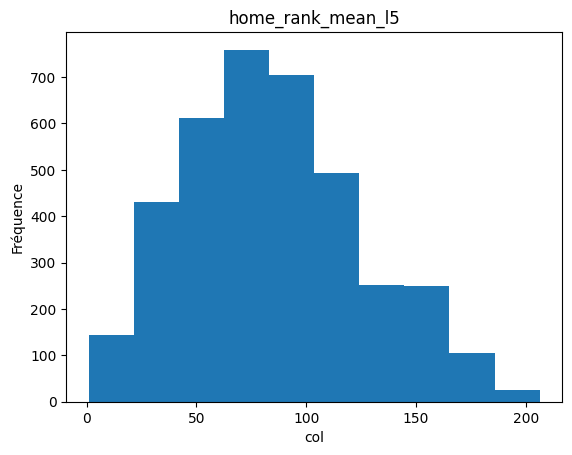


home_points_mean
 count    3763.000000
mean       20.283917
std        62.542519
min      -166.940000
25%       -16.000000
50%         7.000000
75%        49.960000
max       287.290000
Name: home_points_mean, dtype: float64


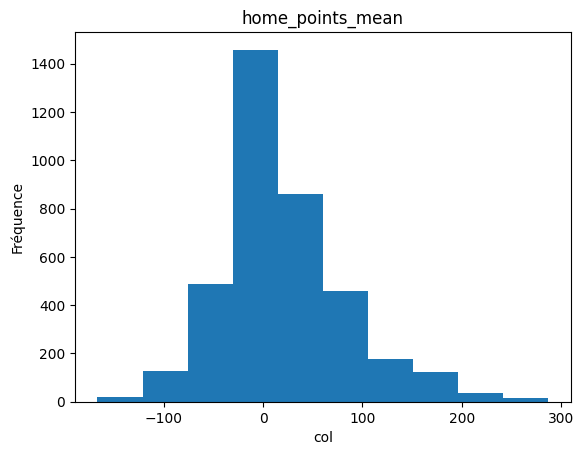


home_points_mean_l5
 count    3777.000000
mean        1.424337
std        17.099149
min       -72.040000
25%        -7.400000
50%         0.000000
75%         9.130000
max       138.000000
Name: home_points_mean_l5, dtype: float64


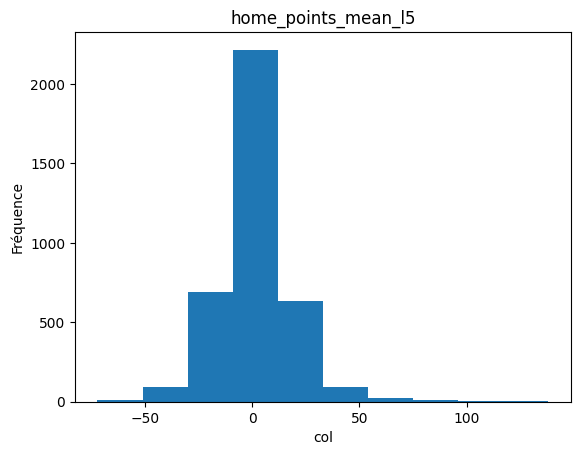


away_points_mean
 count    3777.000000
mean       10.293439
std        57.171734
min      -170.340000
25%       -21.890000
50%         2.000000
75%        37.570000
max       287.290000
Name: away_points_mean, dtype: float64


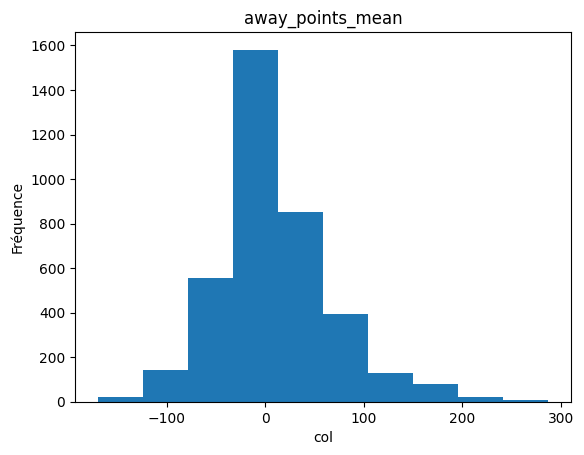


away_points_mean_l5
 count    3777.000000
mean        0.740582
std        16.789257
min       -72.040000
25%        -8.120000
50%         0.000000
75%         8.710000
max       140.000000
Name: away_points_mean_l5, dtype: float64


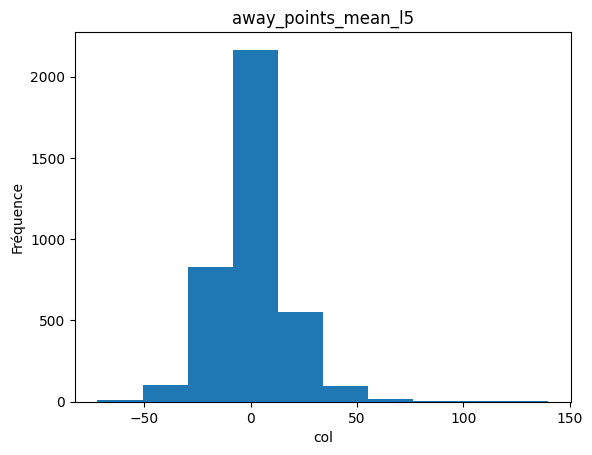

<Axes: >

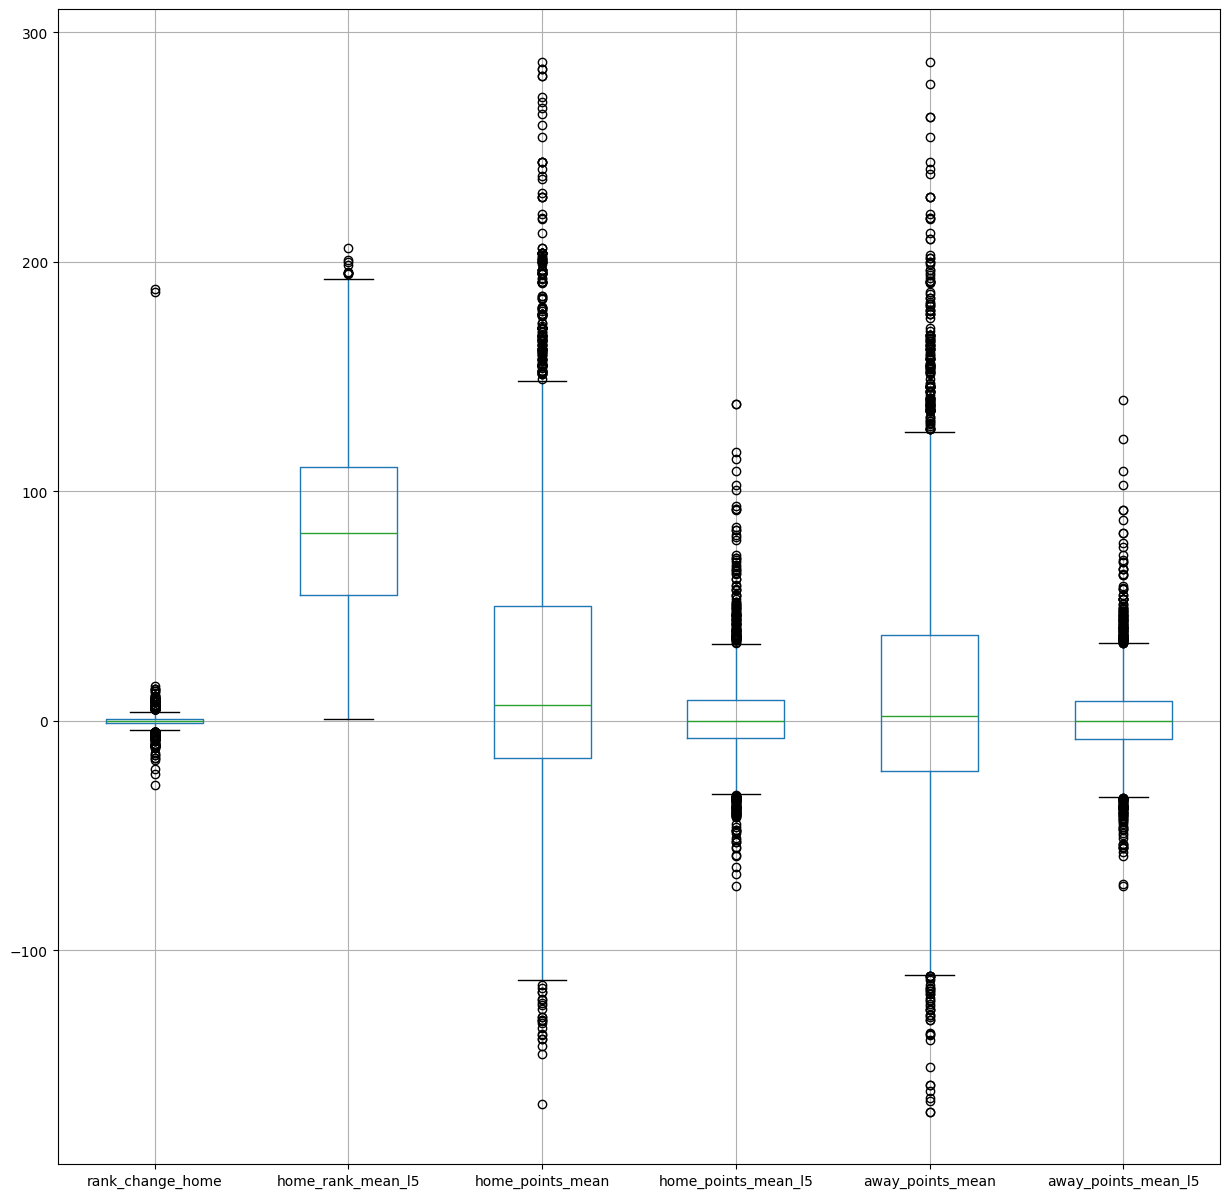

In [10]:
import matplotlib.pyplot as plt

for col in list_champs_suspects: 
    print(col)
    print(f" {df[col].describe()}")


    plt.hist(df[col]) #Pour l'analyse de la distribution des données. 
    plt.title(col)
    plt.xlabel('col')
    plt.ylabel('Fréquence')

    plt.show()
    
    
    print("")
    
df[list_champs_suspects].boxplot(figsize=(15,15)) #Pour l'analyse de la dispersion des données. 



<Axes: >

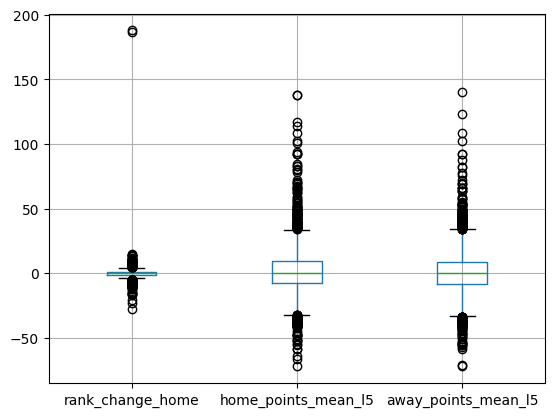

In [11]:
df[['rank_change_home', 'home_points_mean_l5','away_points_mean_l5']].boxplot()

<Axes: >

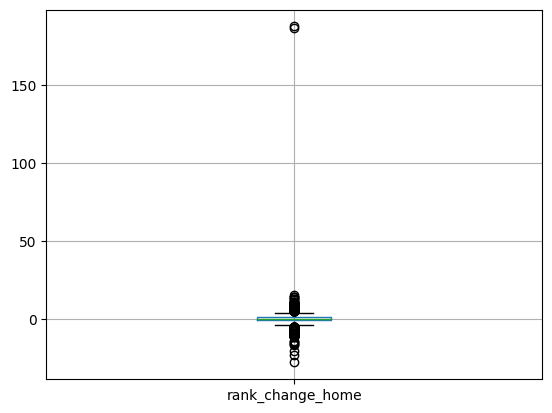

In [13]:
df[['rank_change_home']].boxplot()

Toutes ces caractéristiques étudiées présentent des valeurs abérantes . Cependant la carastéristique du classement fifa moyen de l'équipe à domicile au cours des 5 derniers match (home_rank_mean_l5)présente non seulement une grande dispersion des données mais aussi n'a pas beaucoup de valeurs abérantes.

Les colomnes: home_points_mean, away_points_meain aussi présentent des dispersions larges de données et mais présentent plusieurs valeurs abérantes. 

La colomne plus spéciale est: rank_change_home. A partir de l'histogramme on remarque qu'elle ne représente pas une distribution normale contraire aux autres. Elle comporte beaucoup de données abérantes qui viennent applatir davantange la boite à moustache. Un traitement particulier doit être reservé à cette colomne pour une meilleure optimisation des modèles. 

Avant la gestion des données abérantes, nous réaliserons cette études sur tous les autres caractéristiques du dataframe pour plus de précision 

Conclusion partielle

Cette analyse nous a donc permis d'identifier les caractéristiques présentant des valeurs abérantes et de d'envisager les méthodes de gestion de ces valeurs. Elle a permis de se rendre compte de la présence des valeurs manquantes et de planifier une étape pour leur gestion. 

## II. Quelques études statistiques sur les données

### Note : 

L'interprétation du Target dépend de la position de l'équipe

Home

0= Victoire

1= Défaite ou nul

Away

0= Défaite ou nul

1= Victoire

### Relation Caractéristiques - Target

In [14]:
df.columns

Index(['id', 'date', 'home_team', 'away_team', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'target', 'match_type'],
      dtype='object')

1.  rank_change_home , rank_change_away

In [21]:
df.groupby('target')['rank_change_home'].mean().sort_values()

target
0    0.027207
1    0.128036
Name: rank_change_home, dtype: float64

In [18]:
df.groupby('target')['rank_change_away'].mean().sort_values()

target
0    0.039024
1    0.045902
Name: rank_change_away, dtype: float64

Text(0, 0.5, 'rank_change_home')

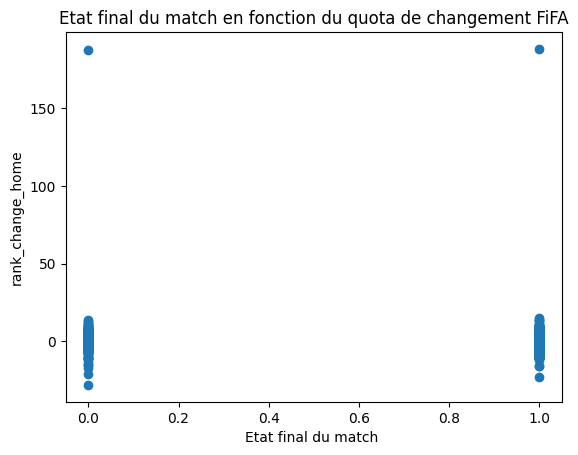

In [17]:
plt.scatter(df['target'],df['rank_change_home'])
plt.title("Etat final du match en fonction du quota de changement FiFA")
plt.xlabel('Etat final du match ')
plt.ylabel('rank_change_home')

Text(0, 0.5, 'rank_change_away')

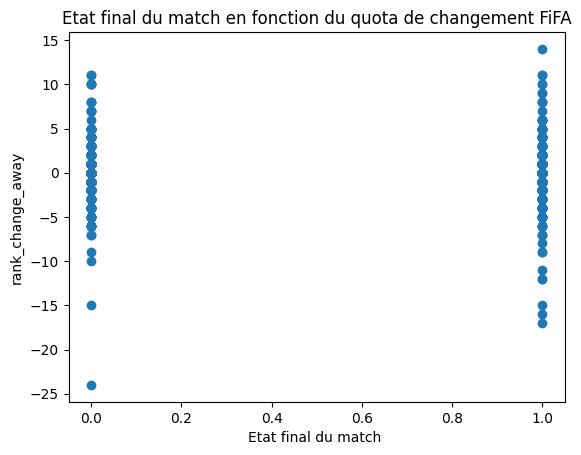

In [21]:


plt.scatter(df['target'],df['rank_change_away'])
plt.title("Etat final du match en fonction du quota de changement FiFA")
plt.xlabel('Etat final du match ')
plt.ylabel('rank_change_away')



On remarque que le quota de changement FIFA attribué au équipe impacte faiblement le resultat du match.En analysant on remarque que

 les équipes à domicile qui ont un rank_change moins élévé ont la chance de gagner le match alors que c'est le contraire pour les 

 équipes étrangères; c'est ceux qui ont un quota de changement FIFA généralement élévé qui gagne les matchs joués à l'extérieure. 

Du coté de l'équipe étrangères l'observation est conforme à la réalité, alors que du coté de l'équipe à domicile, l'observation est 

un peu contradictoire. Peut être que c'est liée à la présence des données abérrante comme nous l'avons remarqué un peu plus en haut. 

On ferra plus tard une annalyse plus poussée pour mieux comprendre la coorrelation entre ces caractéristiques et le target.

In [22]:
df.columns

Index(['id', 'date', 'home_team', 'away_team', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'target', 'match_type'],
      dtype='object')

2.  'home_team', 'away_team'

In [ ]:
colors = np.random.rand(df['home_team'].shape[0], 3)
home_team_counts=df['home_team'].value_counts()
plt.figure(figsize=(20, 40))  # Taille du graphique
bars = plt.barh(home_team_counts.index, home_team_counts.values, color=colors)

# Ajouter des labels
plt.xlabel("Équipe à domicile")
plt.ylabel("Nombre de matchs")
plt.title("Nombre de matchs joués par chaque équipe à domicile")
plt.xticks(rotation=90)


In [ ]:
colors = np.random.rand(df['away_team'].shape[0], 3)
home_team_counts=df['away_team'].value_counts()
plt.figure(figsize=(20, 40))  # Taille du graphique
bars = plt.barh(home_team_counts.index, home_team_counts.values, color=colors)

# Ajouter des labels
plt.xlabel("Équipe à l'extérieur ")
plt.ylabel("Nombre de matchs")
plt.title("Nombre de matchs joués par chaque équipe à l'extérieur")
plt.xticks(rotation=90)

On remarque dans le jeu de donnée que Panama et Keland ont joué plus de match à l'extérieur alors que le Mexique et les USA ont jouée plus de match à domicile.

In [24]:
df['home_team'].value_counts()

home_team
Mexico                      50
United States               49
Qatar                       45
Bahrain                     44
Japan                       43
South Korea                 41
Argentina                   40
South Africa                40
Brazil                      38
Morocco                     38
United Arab Emirates        38
Saudi Arabia                35
Iraq                        33
England                     32
France                      32
Vietnam                     32
Netherlands                 32
Poland                      31
Denmark                     31
Spain                       31
Hungary                     30
Algeria                     30
Malta                       30
Germany                     30
Indonesia                   30
Belgium                     29
Thailand                    29
Portugal                    29
Turkey                      29
Sweden                      28
Peru                        28
Costa Rica                  2

In [26]:
df['away_team'].value_counts()

away_team
Panama                      36
Iceland                     33
Uruguay                     32
Mexico                      31
Serbia                      31
Jamaica                     31
Qatar                       30
Sweden                      30
Costa Rica                  30
Jordan                      29
Zambia                      29
Peru                        29
Honduras                    29
Ecuador                     29
Syria                       29
Tunisia                     29
Colombia                    29
Uganda                      29
Venezuela                   28
Chile                       28
Austria                     28
Saudi Arabia                28
Georgia                     28
Finland                     28
Paraguay                    28
Greece                      28
Lithuania                   27
Turkey                      27
Switzerland                 27
Spain                       27
Estonia                     26
Nigeria                     2

In [25]:

df_grouped_home = df.groupby(['home_team','away_team','target'])['id'].count().sort_index()

df_grouped_home


home_team                 away_team                 target
Afghanistan               Bangladesh                0         1
                          India                     1         2
                          Kuwait                    1         1
                          Oman                      1         1
                          Qatar                     1         2
Albania                   Andorra                   0         1
                          Armenia                   0         1
                          Azerbaijan                0         1
                          Bulgaria                  0         1
                          Chile                     1         1
                          England                   1         1
                          Estonia                   1         1
                          Faroe Islands             1         1
                          France                    1         1
                          Georgia            

In [50]:
df_grouped_away = df.groupby(['away_team','home_team','target'])['id'].count().sort_index()

df_grouped_away 

away_team                 home_team                 target
Afghanistan               Bangladesh                1         2
                          Hong Kong                 0         1
                          India                     0         1
                                                    1         2
                          Indonesia                 1         2
                          Kuwait                    0         1
                          Mongolia                  1         1
                          Philippines               0         1
                          Qatar                     0         1
                          Vietnam                   0         1
Albania                   Andorra                   1         2
                          Belarus                   1         1
                          Croatia                   1         1
                          England                   0         1
                          Faroe Islands      


En analysant rapidement certaines équipes  par exemple Afghanistan; sur 5 matchs joués à domicile, il en a remporté 1 et à l'extérieur sur 11 matchs , il en a remporté juste 4.  on remarque que le fait que l'équipe soit à domicile ou à l'étranger a possiblement un impacte sur sa performance durant un match.

In [ ]:

df_grouped_away1 = df.groupby(['away_team'])['target'].mean().sort_values(ascending=0)

df_grouped_away1 

#Argentina                   0.937500
#Senegal                     0.920000
#Algeria                     0.913043
#Japan                       0.866667
#Iran                        0.857143
#Spain                       0.851852
#England                     0.850000
#Netherlands                 0.850000




away_team
Argentina                   0.937500
Senegal                     0.920000
Algeria                     0.913043
Japan                       0.866667
Iran                        0.857143
Spain                       0.851852
England                     0.850000
Netherlands                 0.850000
Brazil                      0.833333
Germany                     0.807692
Belgium                     0.807692
France                      0.800000
Bahrain                     0.800000
Egypt                       0.800000
Togo                        0.800000
Colombia                    0.793103
Iraq                        0.791667
Italy                       0.782609
Serbia                      0.774194
Morocco                     0.764706
Mali                        0.750000
Portugal                    0.739130
Norway                      0.736842
Denmark                     0.720000
Romania                     0.708333
Kuwait                      0.695652
Thailand                    

 On remarque que dans notre jeu de donnée les équipes:  Argentina, Senegal,Algeria, Japan, Iran,Spain,England,Netherlands ont été très performantes à l'étranger, ils ont gagné plus des 85% des matchs qu'elles ont joués à l'étranger. 

In [ ]:

df_grouped_home1 = df.groupby(['home_team'])['target'].mean().sort_values(ascending=1)

df_grouped_home1 

#Portugal                    0.103448
#Tahiti                      0.166667
#Egypt                       0.222222
#Belgium                     0.241379
#Malaysia                    0.250000
#Samoa                       0.250000
#Italy                       0.250000
#Denmark                     0.258065

home_team
Portugal                    0.103448
Tahiti                      0.166667
Egypt                       0.222222
Belgium                     0.241379
Malaysia                    0.250000
Samoa                       0.250000
Italy                       0.250000
Denmark                     0.258065
Canada                      0.263158
Morocco                     0.263158
Brazil                      0.263158
Australia                   0.272727
Spain                       0.290323
Cuba                        0.300000
England                     0.312500
France                      0.312500
United States               0.326531
New Caledonia               0.333333
Solomon Islands             0.333333
Puerto Rico                 0.333333
Vietnam                     0.343750
Netherlands                 0.343750
Senegal                     0.346154
Argentina                   0.350000
Sweden                      0.357143
Uzbekistan                  0.360000
Jordan                      

 On remarque que dans notre jeu de donnée , Les équipes:Portugal,Tahiti,Egypt,Belgium,Samoa,Italy,Denmark   ont très performantes à domicile. En effets elles ont  gagné plus de 75% des matchs joués à domicile. 





Conclusion partielle: 
Ces calculs pour encore vérifier si le fait que l'équipe soit a domicile ou à l'étranger impacte t'il le resultat du match.
 Celà pourra nous aider pour juger de la pertinence des caractéristiques home_team et away_team pour nos modèles 



In [26]:
df_etude=df # une copie dans une nouvelle variable pour ne pas altérer le contenu par la manipulation.

3. home_goals_mean, home_goals_mean_l5, away_goals_mean, away_goals_mean_l5

In [27]:
df['target'].value_counts()

target
1    1976
0    1801
Name: count, dtype: int64

In [23]:
df.groupby('target')['home_goals_mean'].mean()

target
0    1.500976
1    1.239102
Name: home_goals_mean, dtype: float64

In [24]:

df.groupby('target')['home_goals_mean_l5'].mean()

target
0    1.519286
1    1.209059
Name: home_goals_mean_l5, dtype: float64

<Axes: >

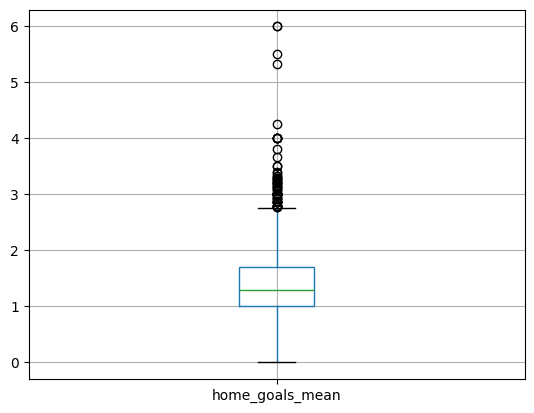

In [25]:
df[['home_goals_mean']].boxplot()

Cela montre que les équipes à domicile qui ont une moyenne de but marqué(derniers ou 5 derniers matchs) elevée ont tendance à gagner le match. Cependant l'écart ne semble pas être trop grand. En analysant de plus on remarque que une partie de la moindre reflexion de cet écart peut être liée (possiblement) à la présence de plusieurs valeurs abérantes.

In [26]:

df.groupby('target')['away_goals_mean'].mean()

target
0    1.188358
1    1.412561
Name: away_goals_mean, dtype: float64

In [28]:

df.groupby('target')['away_goals_mean_l5'].mean()

target
0    1.155627
1    1.439145
Name: away_goals_mean_l5, dtype: float64

Comme les équipes à domicile, l'équipe étrangère qui a une moyenne de but marqué élévé (durant la compétition comme durant les cinq derniers matchs), a plus de chance de battre l'équipe à domicile qu'elle affronte.

4. home_goals_suf_mean, home_goals_suf_mean_l5, away_goals_suf_mean, away_goals_suf_mean_l5

In [40]:
df.groupby('target')['home_goals_suf_mean'].mean()

target
0    1.102528
1    1.385734
Name: home_goals_suf_mean, dtype: float64

In [41]:
df.groupby('target')['home_goals_suf_mean_l5'].mean()

target
0    1.101610
1    1.463192
Name: home_goals_suf_mean_l5, dtype: float64

Ces calculs montrent que les équipes  à domicile qui ont un nombre de but encaissé(derniers ou 5 derniers matchs) faible ont tendance à gagner  à domicile. Ce qui est une tendance qui correspond  à la réalité. Le nombre de but encaisser est un indicateur performant pour l'évaluation de la capacité  défensive d'une équipe.  

In [32]:
df.groupby('target')['away_goals_suf_mean_l5'].mean()

target
0    1.516185
1    1.186682
Name: away_goals_suf_mean_l5, dtype: float64

In [33]:

df.groupby('target')['away_goals_suf_mean'].mean()

target
0    1.471440
1    1.182519
Name: away_goals_suf_mean, dtype: float64

En ce qui concerne  les équipes extérieures, celles  qui ont un nombre de but encaissé faible , ont plus de chance de gagner le match

5. home_rank_mean, home_rank_mean_l5, away_rank_mean, away_rank_mean_l5

In [30]:
df.groupby('target')['home_rank_mean'].mean()


target
0    81.391949
1    89.608496
Name: home_rank_mean, dtype: float64

In [31]:
df.groupby('target')['home_rank_mean_l5'].mean()

target
0    81.611799
1    87.611446
Name: home_rank_mean_l5, dtype: float64

In [32]:
df.groupby('target')['away_rank_mean'].mean()

target
0    94.039627
1    82.680140
Name: away_rank_mean, dtype: float64

In [33]:

df.groupby('target')['away_rank_mean_l5'].mean()

target
0    91.411929
1    83.006722
Name: away_rank_mean_l5, dtype: float64

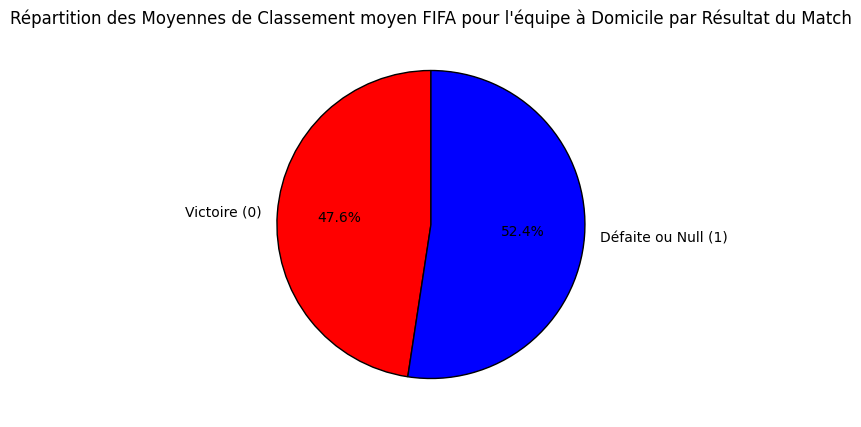

In [29]:

rank_mean = df.groupby('target')['home_rank_mean'].mean()

# Définition des couleurs
colors = ['red', 'blue'] 
labels = [ 'Victoire (0)', 'Défaite ou Null (1)']
plt.figure(figsize=(5, 5))
plt.pie(rank_mean, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

# Ajouter un titre
plt.title("Répartition des Moyennes de Classement moyen FIFA pour l'équipe à Domicile par Résultat du Match")

# Afficher le graphique
plt.show()

<Axes: >

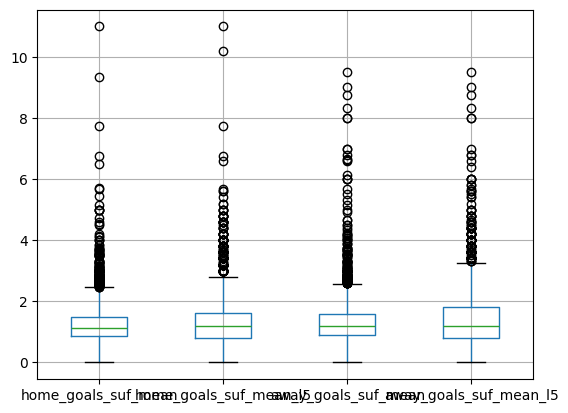

In [34]:
df[['home_goals_suf_mean', 'home_goals_suf_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5']].boxplot()

Nous remarquons l'impacte du classement FIFA sur l'état du score d'un match.

Pour les équipes à domicile, elles ont tendance à gagner le match quand elles ont un faible classement FIFA moyen durant les derniers matchs ou les 5 derniers matchs et perdre ou faire des matchs nuls quand elles ont un classement moyen élévé. 
C'est également le même constat pour les équipes extérieures

Ce qui semble un peu contradictoire donc nous allons poussé des études pour déterminer la correlation de ces caractéristiques avec le target. 
Le boxplot montre la présence de plusieurs valeurs abérantes sur ces caractéristiques ce qui peut possiblement biaiser les résultats.


In [35]:
df.columns

Index(['id', 'date', 'home_team', 'away_team', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'target', 'match_type'],
      dtype='object')

6. home_points_mean, home_points_mean_l5, away_points_mean, away_points_mean_l5

In [36]:
df_etude=df

Pour bien analyser la relation entre les points obtenus par les équipes , nous allons efffectuer des traitements spécifiques sur ces champs en le subdivisant en trois catégories. "Faible", "Moyen", "Élevé. On utilisera la subdivision automatique de la fonction cut de pandas. 

In [37]:
df_etude["home_points_category"] = pd.cut(df["home_points_mean"], bins=3, labels=["Faible", "Moyen", "Élevé"])
grouped = df_etude.groupby("home_points_category")["target"].mean()
grouped

C:\Users\user\AppData\Local\Temp\ipykernel_9080\1125035023.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_etude.groupby("home_points_category")["target"].mean()


home_points_category
Faible    0.649789
Moyen     0.489899
Élevé     0.381743
Name: target, dtype: float64

In [54]:
df.groupby('target')['home_points_mean'].mean()

target
0    31.463612
1    10.097847
Name: home_points_mean, dtype: float64

In [55]:
df.groupby('target')['home_points_mean_l5'].mean()

target
0    3.400966
1   -0.377237
Name: home_points_mean_l5, dtype: float64

In [56]:
df_etude["away_points_category"] = pd.cut(df["away_points_mean"], bins=3, labels=["Faible", "Moyen", "Élevé"])
grouped = df_etude.groupby("away_points_category")["target"].mean()
grouped

C:\Users\user\AppData\Local\Temp\ipykernel_2980\1208413176.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_etude.groupby("away_points_category")["target"].mean()


away_points_category
Faible    0.453155
Moyen     0.541181
Élevé     0.694268
Name: target, dtype: float64

In [57]:
df.groupby('target')['away_points_mean'].mean()

target
0     1.257962
1    18.528710
Name: away_points_mean, dtype: float64

In [58]:
df.groupby('target')['away_points_mean_l5'].mean()

target
0   -0.803393
1    2.147819
Name: away_points_mean_l5, dtype: float64

On remarque une nouvelle tendance en se basant sur les points obtenus par les équipes . 
Les équipes (Domicile comme extérieure) qui ont beaucoup de points ont tendance à gagner le match et ceci tant sur les cinq derniers matchs comme sur la compétition complètement. 

Explication: 

L'interprétation  en se basant sur les points par catégorie "Faible", "Moyen", "Élevé" peut ne pas sembler évidente. 

En faisant la moyenne sur le target c'est pour voir le taux, car le target est composé de 0 et 1. Une moyenne supérieure à 0, 5 montre la présence de plus de 1 que de 0 dans la catégorie donc plus de victoire de l'équipe étrangère ( défaite pour celle à domicile) et moins de défaite ou nul pour l'équipe à domicile.


l'analyse basée sur les catégories, confirme les données fournies par la fonction groupby. 
Pour l'équipe à domicile: 
home_points_category
Faible    0.649789
Moyen     0.489899
Élevé     0.381743

Celà montre qu'on a plus de 0 (victoire) dans la catégorie 'Elevé' ce qui montre que les équipes qui ont une moyenne de point élévée ont tendance à transformer  le match en une victoire. 
 
Pour l'équipe étrangère: 
away_points_category
Faible    0.453155
Moyen     0.541181
Élevé     0.694268

Montre qu'on a plus de 0 (Défaite ou match null) dans la catégorie 'Faible' ce qui montre que les équipes qui ont une moyenne de moins élévée ont tendance à ne pas  concrétiser le match en victoire. 
 

7. match_type

In [38]:
df['match_type'].value_counts(normalize=True)

match_type
Friendly       0.717236
Competition    0.282764
Name: proportion, dtype: float64

In [39]:
df['match_type'].value_counts()

match_type
Friendly       2709
Competition    1068
Name: count, dtype: int64

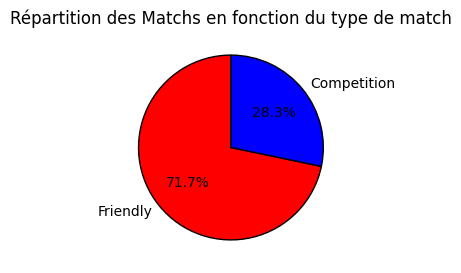

In [40]:
valu = df['match_type'].value_counts()


# Définition des couleurs
colors = ['red', 'blue'] 
plt.figure(figsize=(3, 3))
plt.pie(valu.values, labels=valu.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

# Ajouter un titre
plt.title("Répartition des Matchs en fonction du type de match")

# Afficher le graphique
plt.show()

Notre jeu de donnée comporte majoritairement des matchs amicaux au détriment des ceux de compétition, Ce qui peu poser un peu de problème pour la prédiction du résultat. Généralement les matchs amicaux sont moins engageant car ils sont affectés par plusieurs facteurs comme : 

l'orientation vers des objectifs de moyens que de résultat,

la gestion des joueurs sensibles ou absence de certains joueur clés,

le passage de la majorité des joueurs de l'équipe A comme B, 

le déploiement des essais stratégiques instables ou peu stables.

De plus les matchs amicaux sont généralement organisés pendant les phases de transition, après un petit moment de repos des joueurs afin de préparer l'équipe soit pour la suite et le début des compétitions. Donc les joeurs peuvent ne pas être au top de leur forme pour une meilleure prestation


Cette situation peut affecter la prédiction non seulement des matchs de compétition (plus important pour l'équipe) mais aussi  celle des matchs amicaux

In [41]:
match_ty_tag=df.groupby(['match_type','target'])['id'].count()
match_ty_tag

match_type   target
Competition  0          544
             1          524
Friendly     0         1257
             1         1452
Name: id, dtype: int64

In [45]:
match_ty_tag.index

MultiIndex([('Competition', 0),
            ('Competition', 1),
            (   'Friendly', 0),
            (   'Friendly', 1)],
           names=['match_type', 'target'])

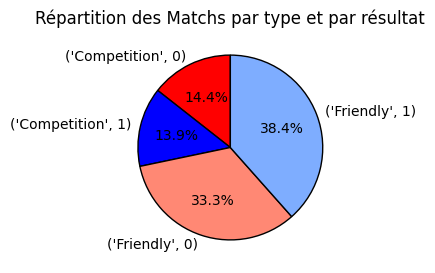

In [ ]:
match_ty_tag=df.groupby(['match_type','target'])['id'].count()

# Définition des couleurs
colors = ['red', 'blue','#FF8874','#7EADFF'] 
colors = ['green', 'yellow','rgb(201, 250, 200)','rgb(250, 244, 176)'] 

plt.figure(figsize=(3, 3))
plt.pie(match_ty_tag.values, labels=match_ty_tag.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

# Ajouter un titre
plt.title("Répartition des Matchs par type et par résultat")

# Afficher le graphique
plt.show()


Dans le jeu de donnée, les confrotations amicales ont été majoritairement concrétisée par les équipes jouant à l'extérieur, alors que celles de compétition sont enrégistrées avec plus de défaite ou match nul que de victoire pour ces équipes étrangères. 

8. Date

Pour mieux étudier ce champ, nous allons effectuer des conversions et des transitions avant. 

car une vue avec les années reste plus explicite

In [42]:

# 
df['date'] = pd.to_datetime(df['date'])

# Extraction du jour, mois et année
df['jour'] = df['date'].dt.day
df['mois'] = df['date'].dt.month
df['annee'] = df['date'].dt.year

In [43]:
df.groupby('annee')['id'].count().sort_values()

annee
2020    253
2018    257
2024    347
2023    682
2022    687
2019    724
2021    827
Name: id, dtype: int64

la majorité des matchs sont jouée en 2021 et 2019. 

In [44]:
df.groupby('annee')['target'].value_counts().sort_values()

annee  target
2020   0         108
2018   1         121
       0         136
2020   1         145
2024   0         170
       1         177
2023   0         306
2022   0         335
2019   0         350
2022   1         352
2019   1         374
2023   1         376
2021   0         396
       1         431
Name: count, dtype: int64

In [45]:
df_victoire=df[df['target']==1]
df_defaite=df[df['target']==0]


In [46]:

df_victoires_par_annee=df_victoire.groupby('annee')['target'].count().sort_values()
df_victoires_par_annee

annee
2018    121
2020    145
2024    177
2022    352
2019    374
2023    376
2021    431
Name: target, dtype: int64

In [47]:
df_defaites_par_annee=df_defaite.groupby('annee')['target'].count().sort_values()
df_defaites_par_annee

annee
2020    108
2018    136
2024    170
2023    306
2022    335
2019    350
2021    396
Name: target, dtype: int64

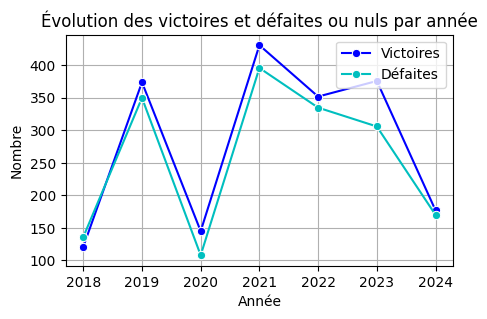

In [48]:
import seaborn as sns

# Tracé de la courbe avec Seaborn
plt.figure(figsize=(5, 3))
sns.lineplot(x=df_victoires_par_annee.index, y=df_victoires_par_annee.values, 
             marker='o', color='b', label="Victoires")

sns.lineplot(x=df_defaites_par_annee.index, y=df_defaites_par_annee.values, 
             marker='o', color='c', label="Défaites")

plt.xlabel("Année")
plt.ylabel("Nombre")
plt.title("Évolution des victoires et défaites ou nuls par année")
plt.grid(True) 
plt.legend() 

# Affichage
plt.show()

Pour les équipes à l'extérieur, 
Le nombre de victoire à tendance a être supérieur par rapport au nombre de défaite ou de nul sauf en 2018. 
L'année 2021 étant l'année ayant connu plus de match a également totaliser plus de victoire pour ces équipes jouant à l'extérieur 



## II.  Relation caractéristiques - caractéristiques

#### 1.rank_change_away --- away_goals_mean_l5 -- away_goals_mean 

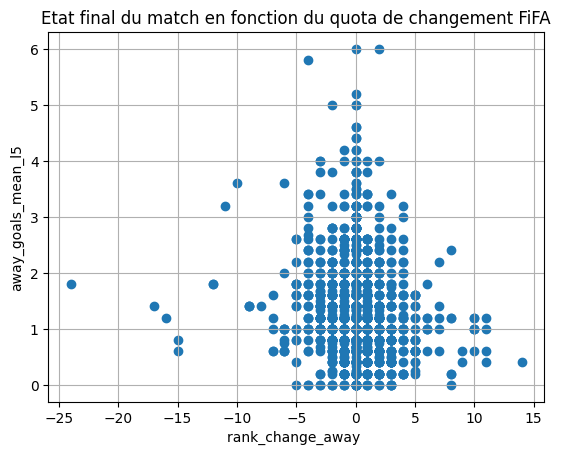

In [20]:

plt.scatter(df['rank_change_away'],df['away_goals_mean_l5'])
plt.title("Etat final du match en fonction du quota de changement FiFA")
plt.xlabel('rank_change_away ')
plt.ylabel('away_goals_mean_l5')
plt.grid(True) 


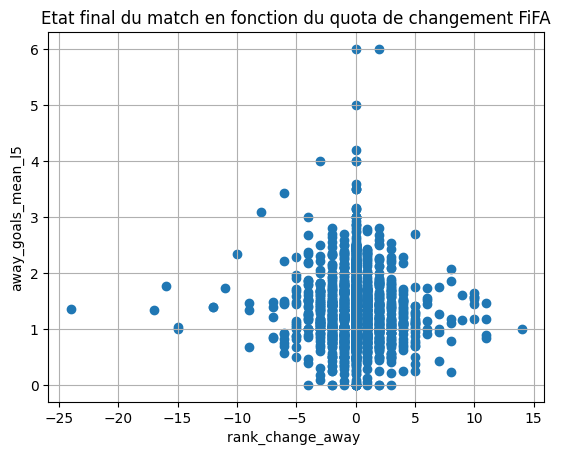

In [21]:

plt.scatter(df['rank_change_away'],df['away_goals_mean'])
plt.title("Etat final du match en fonction du quota de changement FiFA")
plt.xlabel('rank_change_away ')
plt.ylabel('away_goals_mean_l5')
plt.grid(True) 


Ces deux graphiques montrent que les équipes en déplacement marquent généralement entre 0 et 3 buts, quel que soit leur changement de classement FIFA.
On remarque aussi qu'il n'y a pas de corrélation évidente, mais les équipes avec un classement stable ont tendance à avoir des performance(nombre de but marqué )instable  durant les confrontations. 
Pour confirmer cette analyse, on va  analyser la matrice de corrélation 

#### 2.rank_change_home --- home_goals_mean_l5 -- home_goals_mean 

In [77]:
plt.scatter(df['rank_change_home'],df['home_goals_mean_l5'])
plt.title("Etat final du match en fonction du quota de changement FiFA")
plt.xlabel('rank_change_home ')
plt.ylabel('home_goals_mean_l5')
plt.grid(True) 


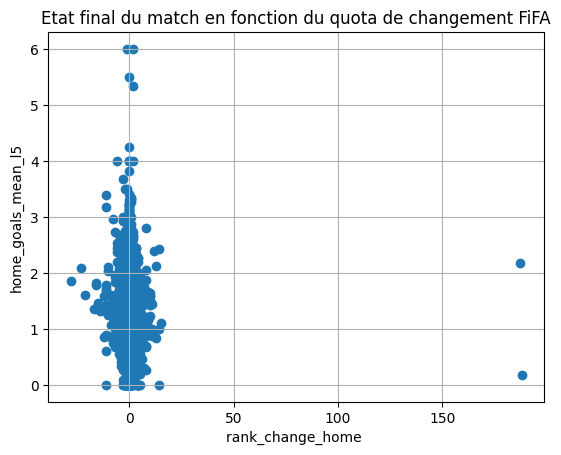

In [22]:
plt.scatter(df['rank_change_home'],df['home_goals_mean'])
plt.title("Etat final du match en fonction du quota de changement FiFA")
plt.xlabel('rank_change_home ')
plt.ylabel('home_goals_mean_l5')
plt.grid(True) 

Le nombre moyen de but marqué  pour les équipes à domicile ne semblent pas fortement corrélées avec le changement de classement FIFA.
Les équipes avec un classement stable (rank_change_home ≈ 0) présentent une grande variété en terme du nombre moyen de but moyen marqué.
Nous remarquons également que quelques équipes ont des changements extrêmes dans leur classement, mais elles n’ont pas nécessairement une meilleure attaque c'est à dire ne marquent pas beaucoup de but. Nous pouvons pousser notre analyse en faisans une catégorisation du caractéristique classement FIFA 

Comme çi- dessous

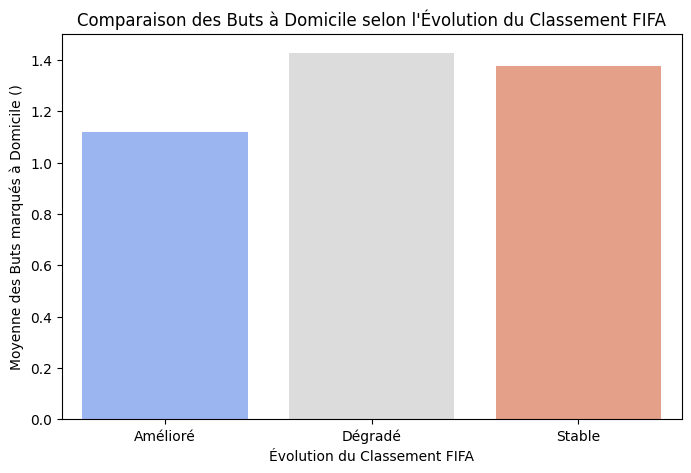

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#fonction de catégorisation à partir du changement de classement FIFA

def categoriser_changement(rank_change):
    if rank_change > 3:
        return "Amélioré"
    elif rank_change < -3:
        return "Dégradé" # Le choix de 3 et -3 est subjectif mais en partie lié au graphique précédent 
    else:
        return "Stable"
df_etude=df

df_etude["Classement_FIFA"] = df_etude["rank_change_home"].apply(categoriser_changement)


moyennes_buts = df_etude.groupby("Classement_FIFA")["home_goals_mean"].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(data=moyennes_buts, x="Classement_FIFA", y="home_goals_mean", palette="coolwarm", hue="Classement_FIFA", legend=False)


plt.xlabel("Évolution du Classement FIFA")
plt.ylabel("Moyenne des Buts marqués à Domicile ()")
plt.title("Comparaison des Buts à Domicile selon l'Évolution du Classement FIFA")

plt.show()


Les équipe à Domicile  sont plus performante quand elles ont des classements dégradées c'est à dire un changement de classement comprise entre -3 et 3. 

In [49]:
df.groupby(['target','home_points_mean','home_goals_mean'])['target'].mean().sort_index()


target  home_points_mean  home_goals_mean
0       -166.94           0.942308           0.0
        -145.04           0.678571           0.0
        -138.73           0.759259           0.0
        -136.88           0.927273           0.0
        -131.71           0.860465           0.0
        -131.01           0.837838           0.0
        -130.60           0.800000           0.0
        -118.02           1.096774           0.0
        -108.87           0.746032           0.0
        -108.60           0.733333           0.0
        -102.57           0.838710           0.0
        -102.55           0.750000           0.0
        -101.35           0.750000           0.0
        -101.26           0.731707           0.0
        -97.36            1.166667           0.0
        -97.11            1.138889           0.0
                          1.142857           0.0
        -96.55            1.083333           0.0
        -95.98            0.777778           0.0
        -95.83            1

In [50]:
df_0=df[df['target']==0]
df_1=df[df['target']==1]

In [51]:

print(f" Equipe à domicile ")
print(f"moyenne des points avec victoire 0  {df_0['home_points_mean'].mean()}")
print(f"moyenne des points avec Défaite ou match nul {df_1['home_points_mean'].mean()}")


print(f" ")
print(f"moyenne des buts en considérant la victoire 0  {df_0['home_goals_mean'].mean()}")

print(f"moyenne des buts avec Défaite ou match nul  {df_1['home_goals_mean'].mean()}")



 Equipe à domicile 
moyenne des points avec victoire 0  31.46361204013378
moyenne des points avec Défaite ou match nul 10.097846622651092
 
moyenne des buts en considérant la victoire 0  1.5009758957680124
moyenne des buts avec Défaite ou match nul  1.239102208269893


Ceci montre qu' une équipe à domicile qui a en moyenne plus de points et qui est performante (marque davantage de buts)  a plus de chances de gagner le match joué à domicile

In [26]:
print(f" Equipe de l'extérieur ")
print(f"moyenne des points avec target 0 (Défaite match nul) {df_0['away_points_mean'].mean()}")
print(f"moyenne des points avec target 1 (Victoire){df_1['away_points_mean'].mean()}")


print(f" ")
print(f"moyenne des buts encaissé avec target 0 (Défaite match nul){df_0['away_goals_suf_mean'].mean()}")

print(f"moyenne des buts encaissé avec target 1 (Victoire){df_1['away_goals_suf_mean'].mean()}")


 Equipe de l'extérieur 
moyenne des points avec target 0 (Défaite match nul) 1.2579622431982245
moyenne des points avec target 1 (Victoire)18.528709514170043
 
moyenne des buts encaissé avec target 0 (Défaite match nul)1.4714399712647577
moyenne des buts encaissé avec target 1 (Victoire)1.1825193189913838


On remarque que si une équipe  encaisse moins de buts en moyenne et a sa moyenne de point élévée, elle plus de chance de gagner des matchs qu'elle joue a l'extérieure.

# III. Etude de l'étiquette

In [27]:
df['target'].value_counts()


target
1    1976
0    1801
Name: count, dtype: int64

In [28]:
df['target'].isna().sum()

np.int64(0)

In [ ]:
df['target'].hist()

On remarque qu'il y a plus  de défaite ou de match nul pour l'équipe à domicile que de victoire , donc il y a répartition inégale de l'étiquette mais les données ne sont pas trop imbalancées. Donc l'usage des méthodes d'équilibrage( stratification , suréchantillonnage, souséchantillonnage) sont optionnelles ainsi que l'évaluation des modèles avec des métriques spécifiques. 



# III. Coorelation caractéristiques- caractéristiques / caractéristiques- étiquette

In [52]:
df.columns


Index(['id', 'date', 'home_team', 'away_team', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'target', 'match_type',
       'home_points_category', 'jour', 'mois', 'annee'],
      dtype='object')

In [53]:
list=[  'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5','target']

In [54]:
matrice=df[list].corr()
matrice


,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target
rank_change_home,1.000000,0.004360,-0.053333,-0.068907,0.184347,0.196897,0.018259,0.011341,-0.068257,-0.127510,-0.037754,-0.021917,0.116498,0.103648,0.036201,0.029399,-0.004791,-0.004786,0.010092
rank_change_away,0.004360,1.000000,-0.002664,0.022764,0.009075,0.023530,-0.025877,-0.026186,-0.014871,-0.018654,-0.044334,-0.123231,0.029945,0.128464,-0.036786,-0.045497,-0.111740,-0.272870,0.001414
home_goals_mean,-0.053333,-0.002664,1.000000,0.738638,-0.491231,-0.411112,-0.149951,-0.122543,0.520273,0.258491,0.161189,0.099609,-0.087837,-0.063520,-0.103305,-0.115975,0.104940,0.035337,-0.216160
home_goals_mean_l5,-0.068907,0.022764,0.738638,1.000000,-0.360055,-0.397609,-0.106621,0.092537,0.363166,0.309890,0.114170,0.111044,-0.046105,-0.041434,-0.036735,-0.010950,0.050790,0.017738,-0.185658
home_goals_suf_mean,0.184347,0.009075,-0.491231,-0.360055,1.000000,0.805046,0.260853,0.234292,-0.416072,-0.243689,-0.050621,-0.028098,0.244178,0.185383,0.185849,0.187223,-0.099418,-0.037734,0.206985
home_goals_suf_mean_l5,0.196897,0.023530,-0.411112,-0.397609,0.805046,1.000000,0.209621,0.049084,-0.321602,-0.329674,-0.045450,-0.035095,0.177237,0.165575,0.125514,0.107442,-0.061845,-0.018120,0.208255
home_rank_mean,0.018259,-0.025877,-0.149951,-0.106621,0.260853,0.209621,1.000000,0.859086,-0.227598,-0.099269,-0.121211,-0.059617,0.216219,0.166117,0.664667,0.626579,-0.097963,-0.046778,0.113817
home_rank_mean_l5,0.011341,-0.026186,-0.122543,0.092537,0.234292,0.049084,0.859086,1.000000,-0.219425,-0.076141,-0.116707,-0.032085,0.210947,0.138611,0.606530,0.610708,-0.119190,-0.047298,0.074417
home_points_mean,-0.068257,-0.014871,0.520273,0.363166,-0.416072,-0.321602,-0.227598,-0.219425,1.000000,0.423936,0.080397,0.018092,-0.115926,-0.081580,-0.117901,-0.138570,0.124286,0.017301,-0.170648
home_points_mean_l5,-0.127510,-0.018654,0.258491,0.309890,-0.243689,-0.329674,-0.099269,-0.076141,0.423936,1.000000,0.029587,0.016103,-0.051180,-0.044428,-0.061053,-0.048329,0.018330,0.002118,-0.110375


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrice)



### Interprétation du matrice

#### Les caractéristiques  ayant une forte corrélation positive avec le target
- home_goals_suf_mean, home_goals_suf_mean_l5:
Cela signifie que si une équipe encaisse plus de buts , elle a tendance à perdre le match à domicile. 

- home_rank_mean: 
Plus une équipe est entrain d'amélioré son classement FiFA,  elle a très peu de chance de gagner son match à domicile (un peu contradictoire)

-  away_points_mean: 
Plus le nombre moyen de point de l'équipe extérieure est grand plus elle a de chance de gagner le match. 

- away_goals_mean, away_goals_mean_l5 : Plus le nombre moyen de but marqué par l'équipe extérieure est grand plus il est problable qu'elle remporte le match. 


#### Les caractéristiques  ayant une forte corrélation négative avec le target

- home_goals_mean,home_goals_mean_l5,

Plus le nombre moyen de but marqué par l'équipe domicile est grand plus  elle a de chance de gagner le match. 


-home_points_mean,home_points_mean_l5:
Plus le nombre moyen de point de l'équipe à domicile est grand plus elle a de chance de gagner le match. 


- away_goals_suf_mean, away_goals_suf_mean_l5,

Cela signifie que si l' équipe étrangère encaisse beaucoup de buts  elle risque  de perdre le macth 



away_rank_mean, away_rank_mean_l5:

Cela signifie que si l' équipe étrangère a un classement FIFA moyen élévé (tous les matchs précédents ou 5 derniers matchs)   elle risque  de perdre le macth (un peu contradictoire)


#### Les caractéristiques  ayant une faible corrélation positive avec le target

- rank_change_home, rank_change_away, home_rank_mean_l5, away_points_mean_l5:

Ces caractéristiques impactent faiblement le resultat des matchs. mais peuvent être combinée pour faire des prédictions. 

#### Les caractéristiques  ayant une faible corrélation négative avec le target

Pas de caractéristique dans ce groupe

.

### Quelques calculs d'approfondissement


C'est l'étape d'approffondir les études sur les caractéristiques dont la correlation avec le target ne semblent pas totalement concorder avec la réalité.

#### Les caractéristiques  ayant une forte corrélation positive avec le target

- home_rank_mean

Notons : 

df_1: dataFrame avec target à 1

df_0: dataFrame avec target à 0

In [56]:
df['home_rank_mean'].min()


np.float64(1.0)

In [59]:
df_1['home_rank_mean'].mean()


np.float64(89.60849630444322)

In [60]:
df_0['home_rank_mean'].mean()

np.float64(81.39194902918004)

In [61]:
df.groupby(['target','home_rank_mean'])['target'].mean().sort_index(ascending=False)

target  home_rank_mean
1       195.000000        1.0
        194.666667        1.0
        192.666667        1.0
        192.500000        1.0
        190.750000        1.0
        190.000000        1.0
        189.500000        1.0
        188.000000        1.0
        186.666667        1.0
        186.500000        1.0
        185.000000        1.0
        184.615385        1.0
        184.600000        1.0
        183.500000        1.0
        183.200000        1.0
        183.166667        1.0
        182.555556        1.0
        182.222222        1.0
        181.750000        1.0
        181.000000        1.0
        180.500000        1.0
        180.400000        1.0
        180.166667        1.0
        180.000000        1.0
        179.454545        1.0
        179.000000        1.0
        178.000000        1.0
        177.571429        1.0
        177.181818        1.0
        176.500000        1.0
        175.666667        1.0
        175.545455        1.0
        173.69230

array([[<Axes: title={'center': 'home_rank_mean'}>]], dtype=object)

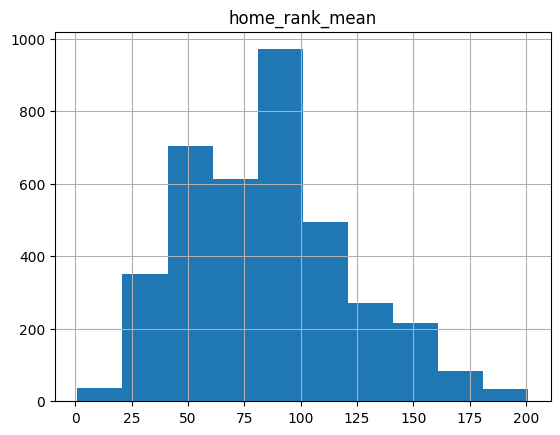

In [63]:
df[['home_rank_mean']].hist()

<Axes: >

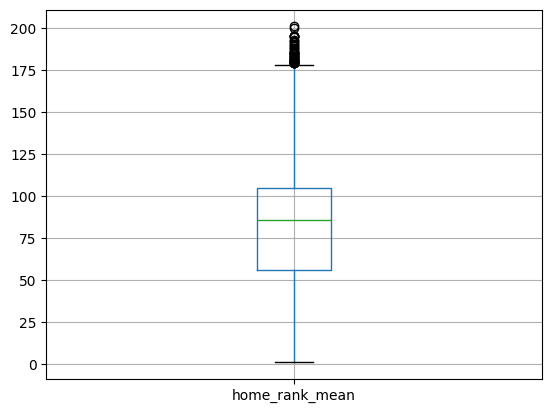

In [62]:
df[['home_rank_mean']].boxplot()

Ces calculs confirment juste les données fournies par la matrice de coorrelation. 

Plus une équipe a un classement FiFA amélioré plus elle risque de perdre le match à domicile. La présence des données abérantes peuvent être des sources possible provoquant cette anomalie dans les resultats qui ne cadre pas parfaitement avec la réalité 

- away_rank_mean, away_rank_mean_l5

In [65]:
df.groupby(['target'])['away_rank_mean'].mean().sort_index(ascending=False)

target
1    82.680140
0    94.039627
Name: away_rank_mean, dtype: float64

In [66]:
df.groupby(['target','away_rank_mean'])['target'].mean().sort_index(ascending=False)

target  away_rank_mean
1       203.000000        1.0
        192.000000        1.0
        191.000000        1.0
        187.875000        1.0
        186.250000        1.0
        185.000000        1.0
        183.400000        1.0
        183.181818        1.0
        183.083333        1.0
        182.285714        1.0
        182.000000        1.0
        181.769231        1.0
        176.916667        1.0
        176.800000        1.0
        175.250000        1.0
        175.200000        1.0
        175.000000        1.0
        172.875000        1.0
        172.000000        1.0
        169.636364        1.0
        168.000000        1.0
        167.300000        1.0
        166.600000        1.0
        166.437500        1.0
        166.090909        1.0
        166.000000        1.0
        165.260870        1.0
        165.250000        1.0
        165.166667        1.0
        165.000000        1.0
        164.941176        1.0
        164.933333        1.0
        164.10526

array([[<Axes: title={'center': 'away_rank_mean'}>]], dtype=object)

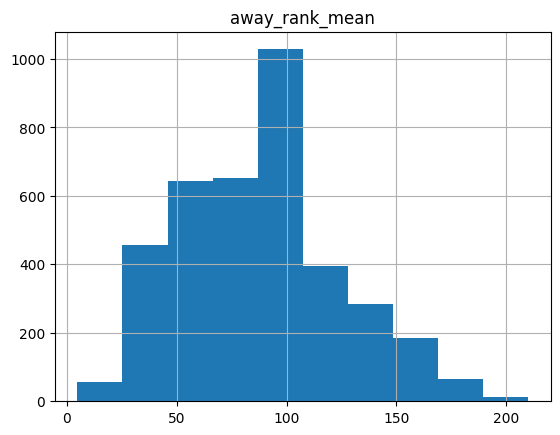

In [70]:
df[['away_rank_mean']].hist()



<Axes: >

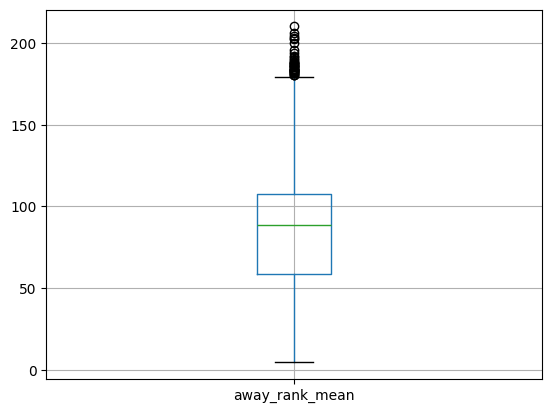

In [69]:
df[['away_rank_mean']].boxplot()


Ces calculs confirment juste les données fournies par la matrice de coorrelation. 

Plus une équipe a un classement FiFA amélioré plus elle risque de perdre le match à l'extérieur. La présence des données abérantes peuvent biaisé les resultats. 

Une bonne gestion des données abérrantes peut permettre d'obtenir des resultats plus ou moins compatible 

# Partie 2 Prétraitement des données. 

## I. gestion des données catégorielles

In [43]:
import pandas as pd
df = pd.read_csv('football.csv')
competition=pd.read_csv('competition.csv')

In [44]:
df.columns



Index(['id', 'date', 'home_team', 'away_team', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'target', 'match_type'],
      dtype='object')

In [ ]:

list=df.select_dtypes(include=['object','category']).columns

# Pour récuperer   la liste des caractéristiques textuelles ou catégoriques

In [46]:
df[list].nunique()# analyse des occurrences des caractéristiques sélectionnées 


date          651
home_team     195
away_team     196
match_type      2
dtype: int64

Après analyse nous avons décidé de supprimer le champ id parce qu'il présente beaucoup d'occurences et qui n'ont pas de correlation avec le target.

les champs à encoder sont:  match_type , home_team, away_team

Un traitement spécifique sera accordé au champs Date.                 

In [5]:
# Les champs à supprimer : id    

### 1 traitement de la colomne date

In [47]:
df['date'] # Nous allons le convertir en durée en prenant pour référence la date 1970-01-01
competition['date']

0      2022-09-27
1      2021-11-13
2      2018-11-18
3      2019-03-24
4      2021-11-12
          ...    
940    2022-06-11
941    2018-10-14
942    2024-03-21
943    2022-12-23
944    2019-11-18
Name: date, Length: 945, dtype: object

In [48]:
df["date"] = pd.to_datetime(df["date"]) # transformation de la date au format datetime64



competition["date"] = pd.to_datetime(competition["date"]) # transformation de la date au format datetime64 pour


In [49]:
df['date'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')# convertion en durée à partir de la date référentielle

competition['date'] = (competition['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')# convertion en durée à partir de la date référentielle



On a le choix entre supprimer les deux caractéristiques ou les encoder (home_team, away_team ). Nous allons analyser ces deux options.

### 2. a- traitement par suppression des colomnes : home_team, away_team   , id

La colomne id n'apporte aucune information pour faire la prédiction, les deux autres colomnes présente plus occurrences ne favorisant pas leur encodage par OHE

In [10]:
df_supprimer=df.drop(columns=['home_team', 'away_team', 'id'])
competition_sup=competition.drop(columns=['home_team', 'away_team', 'id'])

### 2. b- traitement par encodage par fréquence des colomnes : home_team, away_team  et suppression id

C deux autres colomnes présentent plusieurs occurrences donc nous allons l'encoder par l'encodage de fréquence.

In [50]:
df_supprimer=df.drop(columns=['id'])
competition_sup=competition.drop(columns=['id'])


compte = df_supprimer['home_team'].value_counts()
df_supprimer['home_team'] = df_supprimer['home_team'].map(compte)

compte2 = df_supprimer['away_team'].value_counts()
df_supprimer['away_team'] = df_supprimer['away_team'].map(compte2)





In [51]:

compte_cp = competition['home_team'].value_counts()
competition_sup['home_team'] = competition_sup['home_team'].map(compte_cp)

compte_cp2 = competition_sup['away_team'].value_counts()
competition_sup['away_team'] = competition_sup['away_team'].map(compte_cp2)

In [52]:
competition_sup.isna().sum()

date                      0
home_team                 0
away_team                 0
rank_change_home          0
rank_change_away          0
home_goals_mean           0
home_goals_mean_l5        0
home_goals_suf_mean       0
home_goals_suf_mean_l5    0
home_rank_mean            0
home_rank_mean_l5         0
home_points_mean          0
home_points_mean_l5       0
away_goals_mean           0
away_goals_mean_l5        0
away_goals_suf_mean       0
away_goals_suf_mean_l5    0
away_rank_mean            0
away_rank_mean_l5         0
away_points_mean          0
away_points_mean_l5       0
match_type                0
dtype: int64

### 3.encodage de la caractéristique type de match 

Elle présente moins d'occurrence . Juste deux donc on va encoder avec OHE

In [53]:
df_encoder=pd.get_dummies(df_supprimer, columns=['match_type'])
competition_enc=pd.get_dummies(competition_sup, columns=['match_type'])

In [54]:
cat_cols = df_encoder.select_dtypes(include=["object", "category"]).columns
print("Colonnes catégorielles :", cat_cols)

Colonnes catégorielles : Index([], dtype='object')


In [16]:
competition_enc.shape

(945, 23)

In [17]:
df_encoder.shape

(3777, 24)

### 4. Gestion des données aberrantes

Nous allons reparcourir les colomnes pour identifier celle qui présentent des données aberrantes . 



In [18]:
df_encoder_base=df_encoder

In [19]:
df.columns


Index(['id', 'date', 'home_team', 'away_team', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'target', 'match_type'],
      dtype='object')

In [20]:
list=['rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5']


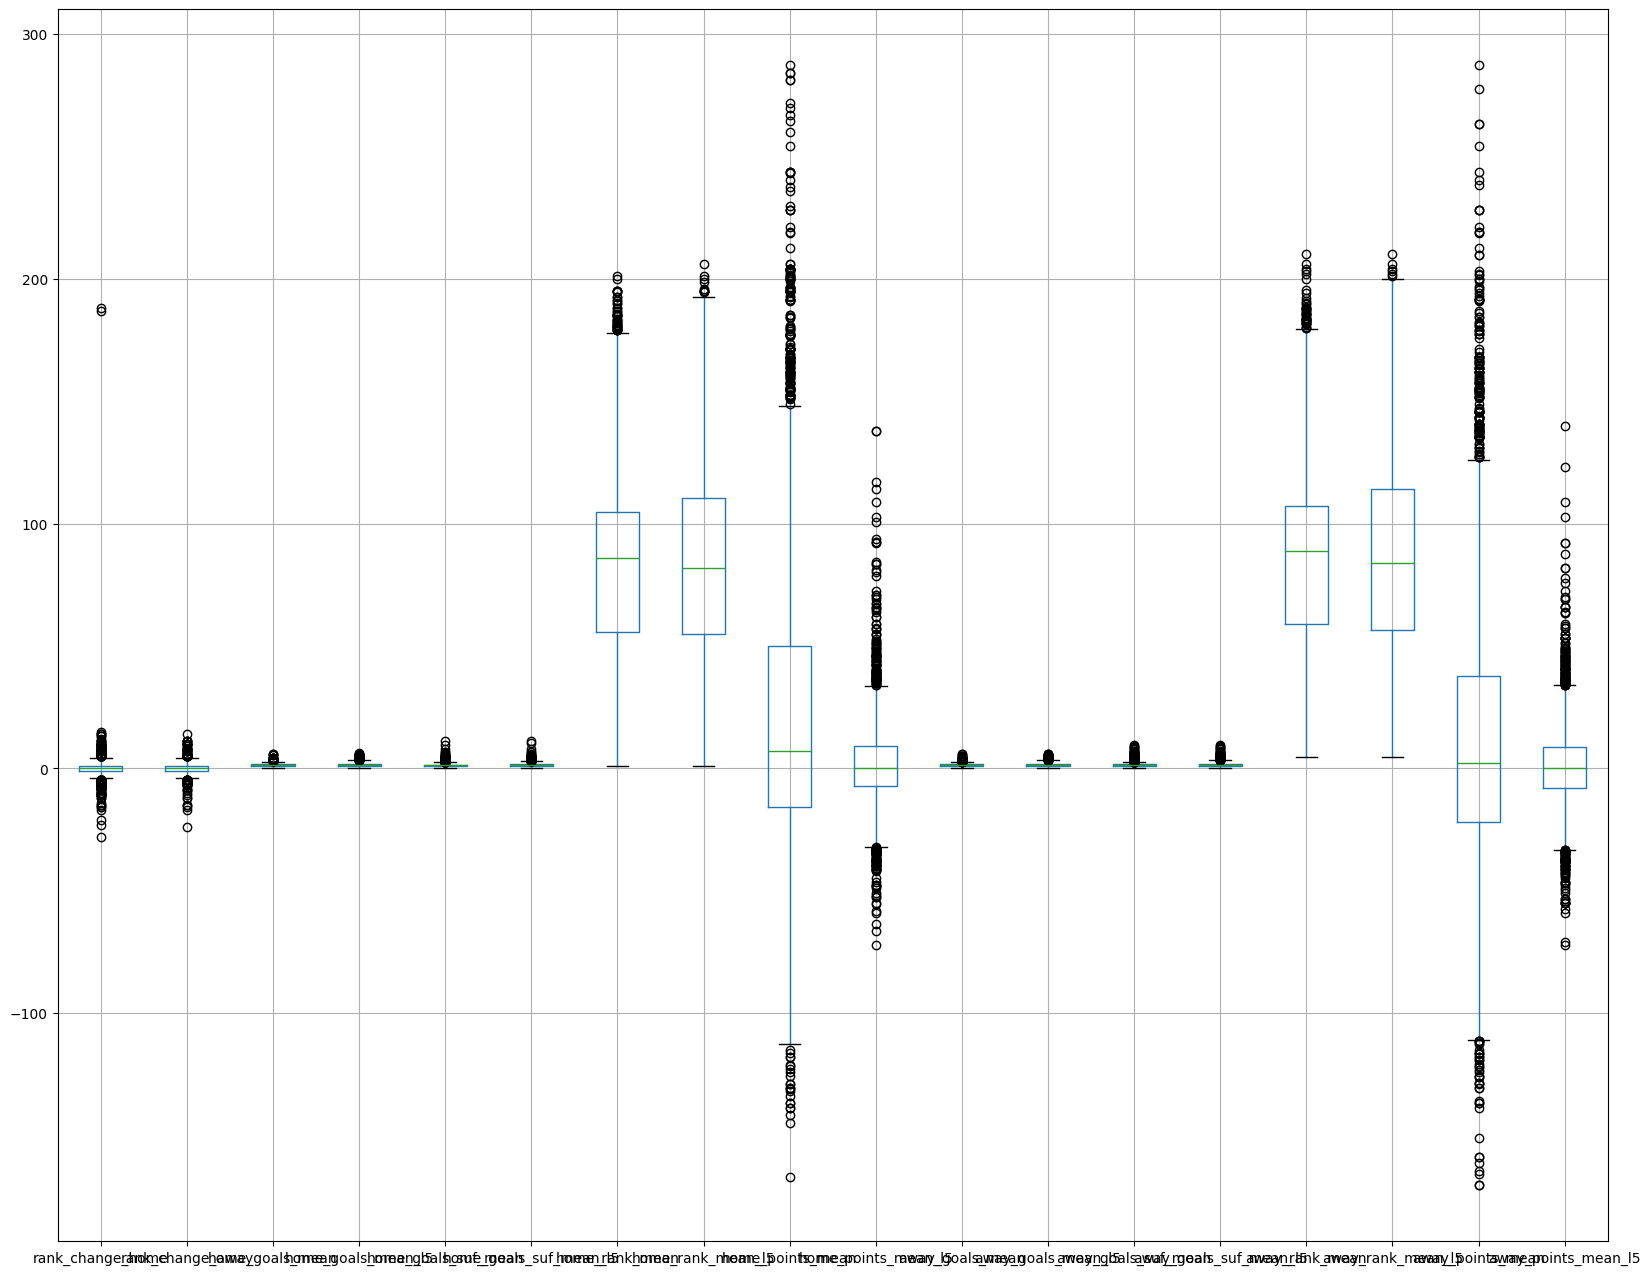

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))  # Ajustez la taille selon vos besoins
df_encoder[list].boxplot()
plt.show()

Nous allons subdivisé nos caractéristique en plusieurs groupes(5 groupes) puis faire le traitement de chaque partie.

Pour chaque caractéristique nous allons nous baser sur la réalité et la quantité des données à amputer  pour prendre la décision sur les valeurs limites. Notons que nous allons gérer les données abérrantes par amputation

groupe 1

<Axes: >

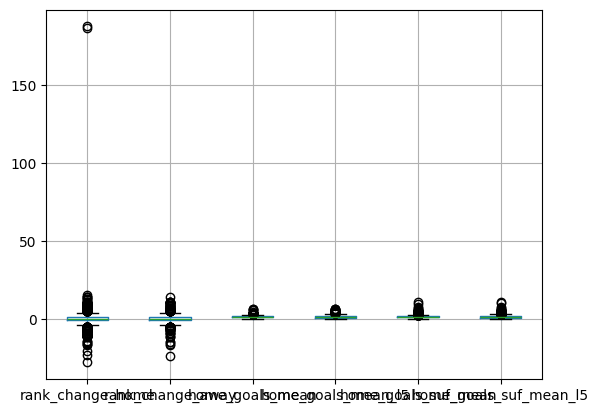

In [99]:
list_part1=['rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5']
df_encoder[list_part1].boxplot()

<Axes: >

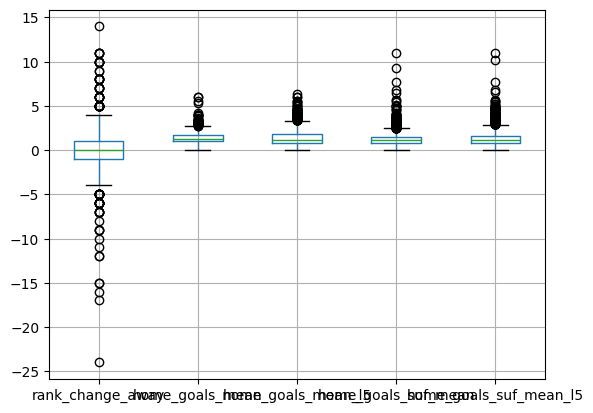

In [100]:
list_part1=[
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5']
df_encoder[list_part1].boxplot()

In [101]:
list_part1=[
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5']

In [102]:
df_encoder.shape

(3777, 22)

In [103]:
df_encoder[(df_encoder['rank_change_away'] >= 7)].shape

(24, 22)

In [104]:
df_encoder[(df_encoder['rank_change_away'] >= 7)].shape

(24, 22)

In [105]:
df_encoder[(df_encoder['rank_change_away'] <= -3)].shape

(150, 22)

In [106]:
df_encoder_base.shape

(3777, 22)

In [107]:
df_encoder['rank_change_away'].isna().sum()


np.int64(2042)

In [108]:
df_encoder[(df_encoder['rank_change_away'] <= -7)].shape

(18, 22)

In [109]:
df_encoder = df_encoder[(((df_encoder['rank_change_away'] >= -7) & (df_encoder['rank_change_away'] <= 7))| (df_encoder['rank_change_away'].isna())) ]


In [110]:
df_encoder=df_encoder_base

Après la vérification de la quantité d'informations perdues nous avons choisie les valeurs min et max pour nos caractéristiques. Comme nous n'avons pas encore traiter les données manquantes , nous devons faire attention à ne pas supprimer les lignes qui contiennent ces valeurs manquantes

In [111]:
#rank_change_home
df_encoder = df_encoder[((df_encoder['rank_change_home'] >= -3) & (df_encoder['rank_change_home'] <= 4) )| (df_encoder['rank_change_home'].isna())]
#rank_change_away
df_encoder = df_encoder[((df_encoder['rank_change_away'] >= -5) & (df_encoder['rank_change_away'] <= 5))| (df_encoder['rank_change_away'].isna())]
#home_goals_mean
df_encoder = df_encoder[((df_encoder['home_goals_mean'] >= 0) & (df_encoder['home_goals_mean'] <= 3.5)) | (df_encoder['home_goals_mean'].isna())]
#home_goals_mean_l5
df_encoder = df_encoder[((df_encoder['home_goals_mean_l5'] >= 0) & (df_encoder['home_goals_mean_l5'] <= 3.5)) | (df_encoder['home_goals_mean_l5'].isna())]
#home_goals_suf_mean
df_encoder = df_encoder[((df_encoder['home_goals_suf_mean'] >= 0) & (df_encoder['home_goals_suf_mean'] <= 3.5))| (df_encoder['home_goals_suf_mean'].isna())]
#home_goals_suf_mean_l5
df_encoder = df_encoder[((df_encoder['home_goals_suf_mean_l5'] >= 0) & (df_encoder['home_goals_suf_mean_l5'] <= 3.5))| (df_encoder['home_goals_suf_mean_l5'].isna())]




<Axes: >

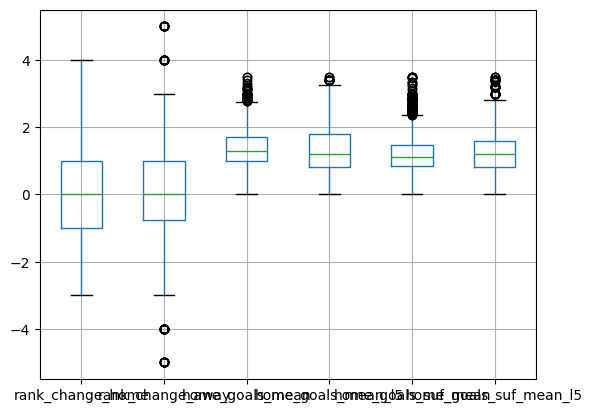

In [112]:
list_part1=['rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5']
df_encoder[list_part1].boxplot()

In [113]:
df_encoder_base.shape

(3777, 22)

In [114]:
df_encoder.shape

(3248, 22)

Pour ce premier groupe , le traitement a été fait et nous avons une meilleure dispersion des données (élargissement de la boite)

groupe 2

<Axes: >

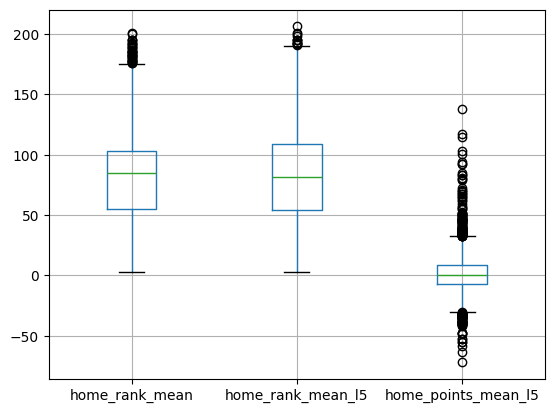

In [115]:
list_part2=[ 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean_l5']
df_encoder[list_part2].boxplot()

In [116]:
df_encoder_base=df_encoder

In [117]:
df_encoder.shape

(3248, 22)

In [118]:
df_encoder[(df_encoder['home_rank_mean'] >= 200)].shape

(2, 22)

In [119]:
df_encoder[(df_encoder['home_rank_mean_l5'] >= 200)].shape

(3, 22)

In [120]:
df_encoder[(df_encoder['home_points_mean_l5'] >= 60)].shape

(25, 22)

In [121]:
df_encoder_base.shape

(3248, 22)

In [122]:
df_encoder['rank_change_away'].isna().sum()


np.int64(1770)

In [123]:
df_encoder[(df_encoder['rank_change_away'] <= -7)].shape

(0, 22)

In [124]:
df_encoder=df_encoder_base

In [125]:
list_part2=[ 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean_l5']

Après la vérification de la quantité d'informations perdues nous avons choisie les valeurs min et max pour nos caractéristiques. Comme nous n'avons pas encore traiter les données manquantes , nous devons faire attention à ne pas les supprimer

In [126]:
#home_points_mean_l5
df_encoder = df_encoder[((df_encoder['home_points_mean_l5'] >= -50) & (df_encoder['home_points_mean_l5'] <= 50) )| (df_encoder['home_points_mean_l5'].isna())]
#home_rank_mean
df_encoder = df_encoder[((df_encoder['home_rank_mean'] >= 0) & (df_encoder['home_rank_mean'] <= 200)) | (df_encoder['home_rank_mean'].isna())]
#home_rank_mean_l5
df_encoder = df_encoder[((df_encoder['home_rank_mean_l5'] >= 0) & (df_encoder['home_rank_mean_l5'] <=200)) | (df_encoder['home_rank_mean_l5'].isna())]




<Axes: >

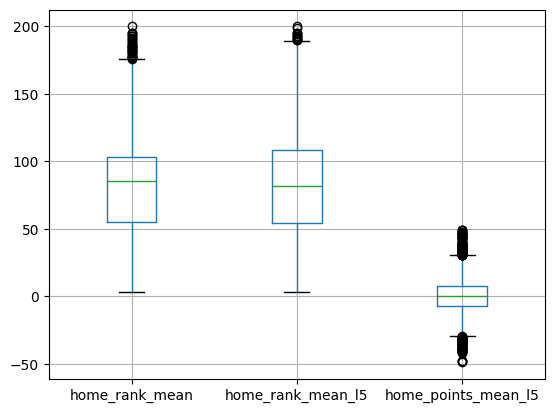

In [127]:
list_part2=[ 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean_l5']
df_encoder[list_part2].boxplot()

In [128]:
df_encoder_base.shape

(3248, 22)

In [129]:
df_encoder.shape

(3203, 22)

groupe 3

In [130]:
df_encoder_base=df_encoder # une copie pour faciliter l'interprétation

<Axes: >

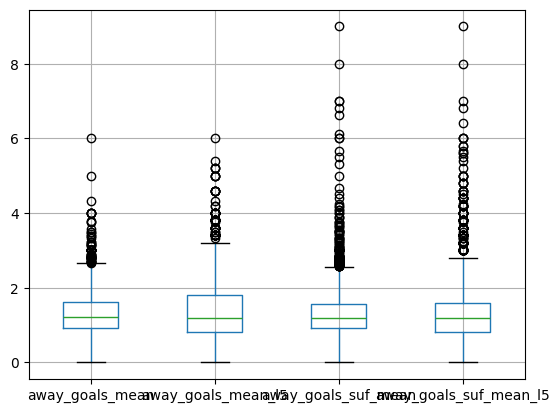

In [131]:
list_part3=['away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5']
df_encoder[list_part3].boxplot()

In [132]:
list_part3=['away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5']

In [133]:
df_encoder.shape

(3203, 22)

In [134]:
df_encoder[(df_encoder['away_goals_mean'] >= 4)].shape

(8, 22)

In [135]:
df_encoder[(df_encoder['away_goals_suf_mean'] >= 5)].shape

(13, 22)

In [136]:
df_encoder_base.shape

(3203, 22)

In [137]:
df_encoder=df_encoder_base # Pour un rechargement ou récupération du dataFrame encoder de base

Après la vérification de la quantité d'informations perdues nous avons choisie les valeurs min et max pour nos caractéristiques. Comme nous n'avons pas encore traiter les données manquantes , nous devons faire attention à ne pas les supprimer

In [138]:
list_part3=['away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5']

In [139]:
#away_goals_mean
df_encoder = df_encoder[((df_encoder['away_goals_mean'] >= 0) & (df_encoder['away_goals_mean'] <= 5) )| (df_encoder['away_goals_mean'].isna())]
#away_goals_mean_l5
df_encoder = df_encoder[((df_encoder['away_goals_mean_l5'] >= 0) & (df_encoder['away_goals_mean_l5'] <= 5))| (df_encoder['away_goals_mean_l5'].isna())]
#away_goals_suf_mean
df_encoder = df_encoder[((df_encoder['away_goals_suf_mean'] >= 0) & (df_encoder['away_goals_suf_mean'] <= 5)) | (df_encoder['away_goals_suf_mean'].isna())]
#away_goals_suf_mean_l5
df_encoder = df_encoder[((df_encoder['away_goals_suf_mean_l5'] >= 0) & (df_encoder['away_goals_suf_mean_l5'] <= 5)) | (df_encoder['away_goals_suf_mean_l5'].isna())]




<Axes: >

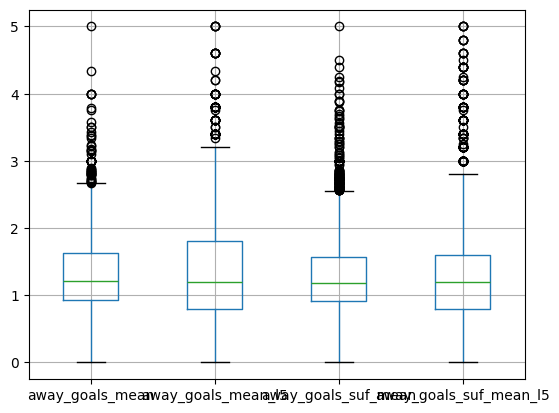

In [140]:

df_encoder[list_part3].boxplot()

In [141]:
df_encoder_base.shape

(3203, 22)

In [142]:
df_encoder.shape

(3182, 22)

groupe 4

<Axes: >

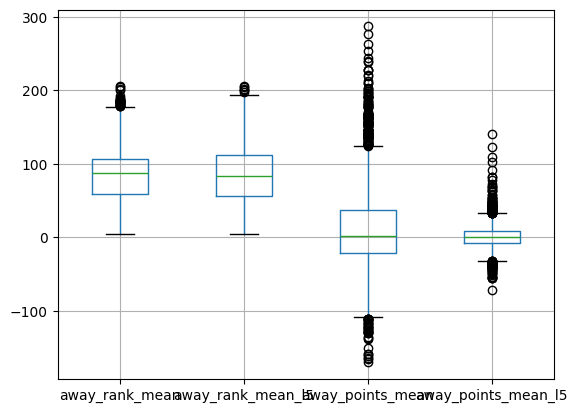

In [143]:
list_part4=[ 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5']

df_encoder[list_part4].boxplot()

Dans ce groupe nous allons plus nous concentrer sur les caractéristiques 'away_points_mean', 'away_points_mean_l5' qui présentent plus de valeurs abérrantes.

In [144]:
df_encoder_base=df_encoder

In [145]:
df_encoder.shape

(3182, 22)

In [146]:
df_encoder[(df_encoder['away_points_mean'] >= 200)].shape

(18, 22)

In [147]:
df_encoder[(df_encoder['away_points_mean'] <= -130)].shape

(12, 22)

In [148]:
df_encoder[(df_encoder['away_points_mean_l5'] >= 100)].shape

(4, 22)

In [149]:
df_encoder[(df_encoder['away_points_mean_l5'] <= -50)].shape

(7, 22)

In [150]:
df_encoder=df_encoder_base

Après la vérification de la quantité d'informations perdues nous avons choisie les valeurs min et max pour nos caractéristiques. Comme nous n'avons pas encore traiter les données manquantes , nous devons faire attention à ne pas les supprimer

In [151]:
#away_points_mean
df_encoder = df_encoder[((df_encoder['away_points_mean'] >= -130) & (df_encoder['away_points_mean'] <= 200) )| (df_encoder['away_points_mean'].isna())]
#away_points_mean_l5
df_encoder = df_encoder[((df_encoder['away_points_mean_l5'] >= -50) & (df_encoder['away_points_mean_l5'] <= 100))| (df_encoder['away_points_mean_l5'].isna())]


<Axes: >

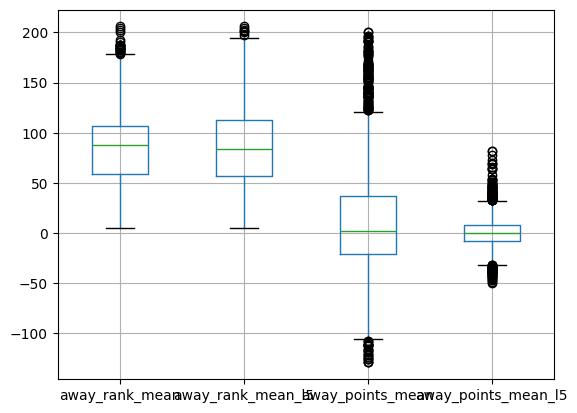

In [152]:

df_encoder[list_part4].boxplot()

In [153]:
df_encoder_base.shape

(3182, 22)

In [154]:
df_encoder.shape

(3143, 22)

groupe 5

<Axes: >

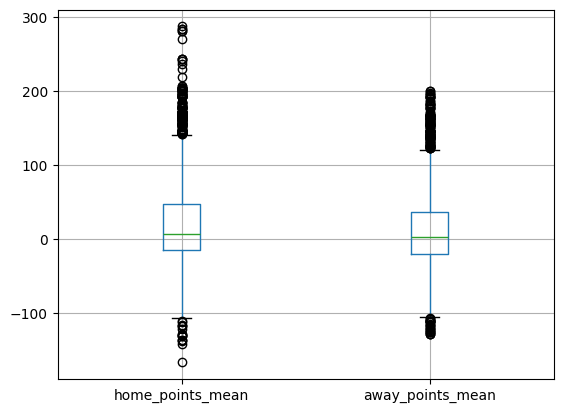

In [155]:
list_part5=['home_points_mean', 'away_points_mean']
df_encoder[list_part5].boxplot()

In [156]:
df_encoder_base=df_encoder

In [157]:
df_encoder.shape

(3143, 22)

In [158]:
df_encoder[(df_encoder['home_points_mean'] >= 180)].shape

(53, 22)

In [159]:
df_encoder[(df_encoder['away_points_mean'] >= 180)].shape

(20, 22)

In [160]:
df_encoder[(df_encoder['home_points_mean'] <= -120)].shape

(11, 22)

In [161]:
df_encoder_base.shape

(3143, 22)

In [162]:
df_encoder=df_encoder_base

Après la vérification de la quantité d'informations perdues nous avons choisie les valeurs min et max pour nos caractéristiques. Comme nous n'avons pas encore traiter les données manquantes , nous devons faire attention à ne pas les supprimer

In [163]:
#away_points_mean
df_encoder = df_encoder[((df_encoder['away_points_mean'] >= -120) & (df_encoder['away_points_mean'] <= 180) )| (df_encoder['away_points_mean'].isna())]
#home_points_mean
df_encoder = df_encoder[((df_encoder['home_points_mean'] >= -120) & (df_encoder['home_points_mean'] <= 180))| (df_encoder['home_points_mean'].isna())]



<Axes: >

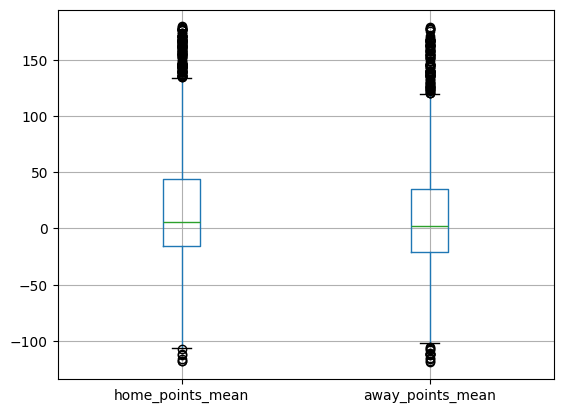

In [164]:

df_encoder[list_part5].boxplot()

In [165]:
df_encoder_base.shape

(3143, 22)

In [166]:
df_encoder.shape

(3050, 22)

Après cette gestion nous avons obtenu un dataframe qui présente moins de données abérrantes pour la suite des études. 

## II. Séparation des caractéristiques de l'étiquette et des données test, de l'entrainement 

Nous allons procédé le plus tôt possible au séparation des données pour mieux gérer la fuite des données 

In [55]:
competition_enc.isna().sum()

date                      0
home_team                 0
away_team                 0
rank_change_home          0
rank_change_away          0
home_goals_mean           0
home_goals_mean_l5        0
home_goals_suf_mean       0
home_goals_suf_mean_l5    0
home_rank_mean            0
home_rank_mean_l5         0
home_points_mean          0
home_points_mean_l5       0
away_goals_mean           0
away_goals_mean_l5        0
away_goals_suf_mean       0
away_goals_suf_mean_l5    0
away_rank_mean            0
away_rank_mean_l5         0
away_points_mean          0
away_points_mean_l5       0
match_type_Competition    0
match_type_Friendly       0
dtype: int64

In [56]:
df_encoder.shape

(3777, 24)

In [57]:
X=df_encoder.drop(columns=['target'])
y=df_encoder['target']


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, shuffle=True, stratify=y, random_state=22, train_size=0.75)


## III. gestion des données manquantes

In [59]:
y.isna().sum()

np.int64(0)

In [60]:
X.isna().sum()

date                         0
home_team                    0
away_team                    0
rank_change_home             0
rank_change_away          2042
home_goals_mean              0
home_goals_mean_l5           0
home_goals_suf_mean         24
home_goals_suf_mean_l5       0
home_rank_mean               0
home_rank_mean_l5            0
home_points_mean            14
home_points_mean_l5          0
away_goals_mean              0
away_goals_mean_l5           0
away_goals_suf_mean         17
away_goals_suf_mean_l5       0
away_rank_mean               0
away_rank_mean_l5            0
away_points_mean             0
away_points_mean_l5          0
match_type_Competition       0
match_type_Friendly          0
dtype: int64

In [61]:
# les champs à traiter: 
#rank_change_away          1660
#home_goals_suf_mean         19
#home_points_mean            12
#away_goals_suf_mean         12


Pour chaque caractérisque nous allons vérifier avec Describe, la meilleure valeur à utiliser pour faire le remplacement des données manquantes. 

##### rank_change_away          

In [62]:
df_encoder['rank_change_away'].describe()

count    1735.000000
mean        0.042651
std         2.428546
min       -24.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: rank_change_away, dtype: float64

In [63]:
X_train['rank_change_away'].median()

np.float64(0.0)

une séparation dans le changement pour éviter la fuite des données. 

In [64]:
X_train['rank_change_away']=X_train['rank_change_away'].fillna(X_train['rank_change_away'].median())
X_test['rank_change_away']=X_test['rank_change_away'].fillna(X_train['rank_change_away'].median())


#### home_points_mean          


In [65]:
df_encoder['home_points_mean'].describe()

count    3763.000000
mean       20.283917
std        62.542519
min      -166.940000
25%       -16.000000
50%         7.000000
75%        49.960000
max       287.290000
Name: home_points_mean, dtype: float64

In [66]:
X_train['home_points_mean']=X_train['home_points_mean'].fillna(X_train['home_points_mean'].median())
X_test['home_points_mean']=X_test['home_points_mean'].fillna(X_train['home_points_mean'].median())






#### home_goals_suf_mean          

In [67]:
df_encoder['home_goals_suf_mean'].describe()

count    3753.000000
mean        1.250658
std         0.683486
min         0.000000
25%         0.857143
50%         1.125000
75%         1.500000
max        11.000000
Name: home_goals_suf_mean, dtype: float64

In [68]:
X_train['home_goals_suf_mean']=X_train['home_goals_suf_mean'].fillna(X_train['home_goals_suf_mean'].median())
X_test['home_goals_suf_mean']=X_test['home_goals_suf_mean'].fillna(X_train['home_goals_suf_mean'].median())



#### away_goals_suf_mean            

In [69]:
df_encoder['away_goals_suf_mean'].describe()

count    3760.000000
mean        1.320218
std         0.737387
min         0.000000
25%         0.910308
50%         1.181818
75%         1.576923
max         9.500000
Name: away_goals_suf_mean, dtype: float64

In [70]:
X_train['away_goals_suf_mean']=X_train['away_goals_suf_mean'].fillna(X_train['away_goals_suf_mean'].median())
X_test['away_goals_suf_mean']=X_test['away_goals_suf_mean'].fillna(X_train['away_goals_suf_mean'].median())





In [71]:
X_train.isna().sum()


date                      0
home_team                 0
away_team                 0
rank_change_home          0
rank_change_away          0
home_goals_mean           0
home_goals_mean_l5        0
home_goals_suf_mean       0
home_goals_suf_mean_l5    0
home_rank_mean            0
home_rank_mean_l5         0
home_points_mean          0
home_points_mean_l5       0
away_goals_mean           0
away_goals_mean_l5        0
away_goals_suf_mean       0
away_goals_suf_mean_l5    0
away_rank_mean            0
away_rank_mean_l5         0
away_points_mean          0
away_points_mean_l5       0
match_type_Competition    0
match_type_Friendly       0
dtype: int64

In [72]:
competition_enc.isna().sum()


date                      0
home_team                 0
away_team                 0
rank_change_home          0
rank_change_away          0
home_goals_mean           0
home_goals_mean_l5        0
home_goals_suf_mean       0
home_goals_suf_mean_l5    0
home_rank_mean            0
home_rank_mean_l5         0
home_points_mean          0
home_points_mean_l5       0
away_goals_mean           0
away_goals_mean_l5        0
away_goals_suf_mean       0
away_goals_suf_mean_l5    0
away_rank_mean            0
away_rank_mean_l5         0
away_points_mean          0
away_points_mean_l5       0
match_type_Competition    0
match_type_Friendly       0
dtype: int64

In [73]:
X_train.columns

Index(['date', 'home_team', 'away_team', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'match_type_Competition',
       'match_type_Friendly'],
      dtype='object')

In [41]:
competition_enc.shape

(945, 23)

In [42]:
X_test.shape

(945, 23)

## IV Mise à l'échelle des caractéristiques

Pour faire notre mise à l'échelle nous allons utiliser la Standardisation. Parce qu'on a remarque que parmis les caractéristiques certaines sont distribuées normalement d'autre non. Nous pourrons garder une option de normalisation pour vérifier la performance de nos modèles

In [74]:
## Standardisation 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.set_output(transform='pandas')
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

competition_test=scaler.transform(competition_enc)

In [82]:
## Normalisation 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.set_output(transform='pandas')
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

competition_test=scaler.transform(competition_enc)

# Partie 3. Développement des modèles et expérimentation

## I. Développement des modèles

### 1. Modèle Linéaire

#### - Modèle linéaire (Logistique)

In [54]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression=LogisticRegression()
model_LogisticRegression.fit(X_train, y_train)


LogisticRegression()

#### - Modèle linéaire (Lasso) 

In [55]:
from sklearn.linear_model import Lasso
model_Lasso=Lasso(alpha=1)
model_Lasso.fit(X_train, y_train)




Lasso(alpha=1)

#### - Modèle linéaire (Rigde)

In [49]:
from sklearn.linear_model import Ridge
model_Ridge=Ridge(alpha=1)
model_Ridge.fit(X_train, y_train)



Ridge(alpha=1)

#### - Modèle linéaire (ElasticNet)

In [50]:
from sklearn.linear_model import ElasticNet
model_ElasticNet=ElasticNet(alpha=1)
model_ElasticNet.fit(X_train, y_train)

ElasticNet(alpha=1)

### 2. Modèle SVM

#### - Modèle SVM avec kernel='linear'

In [51]:
from sklearn.svm import SVC
model_SVC_linear=SVC(kernel='linear',C=0.5,probability=True)
model_SVC_linear.fit(X_train, y_train)


SVC(C=0.5, kernel='linear', probability=True)

#### - Modèle SVM avec kernel='poly'

In [52]:
from sklearn.svm import SVC
model_SVC_poly=SVC(kernel='poly',C=0.5, probability=True)
model_SVC_poly.fit(X_train, y_train)

SVC(C=0.5, kernel='poly', probability=True)

#### - Modèle SVM avec kernel='rbf'

In [53]:
from sklearn.svm import SVC
model_SVC_rbf=SVC(kernel='rbf',C=0.5,probability=True)
model_SVC_rbf.fit(X_train, y_train)

SVC(C=0.5, probability=True)

#### - Modèle SVM avec kernel='sigmoid'

In [54]:
from sklearn.svm import SVC
model_SVC_sigmoid=SVC(kernel='sigmoid',C=0.5,probability=True)
model_SVC_sigmoid.fit(X_train, y_train)

SVC(C=0.5, kernel='sigmoid', probability=True)

### 3. Modèle KNN

#### - Modèle KNN (KNeighborsClassifier) metric='minkowski'

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model_KNeighborsClassifier_minkowski=KNeighborsClassifier(n_neighbors=10, metric='minkowski')
model_KNeighborsClassifier_minkowski.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

#### - Modèle KNN (KNeighborsClassifier) metric='manhattan'

In [56]:
from sklearn.neighbors import KNeighborsClassifier
model_KNeighborsClassifier_manhattan=KNeighborsClassifier(n_neighbors=10, metric='manhattan')
model_KNeighborsClassifier_manhattan.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

### 4. Modèle à base d'arbres

#### - Modèle Arbre de decision (DecisionTreeClassifier)

In [57]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTreeClassifier=DecisionTreeClassifier()
model_DecisionTreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

#### - Modèle Arbre de decision (RandomForestClassifier)

In [58]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForestClassifier=RandomForestClassifier(n_estimators=500)
model_RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

#### - Modèle Arbre de decision (ExtraTreesClassifier)

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
model_ExtraTreesClassifier=ExtraTreesClassifier(n_estimators=500)
model_ExtraTreesClassifier.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=500)

## - II. Evaluation des modèles

L'évaluation sera fait en deux temps. 

Dans un premier temps nous allons utilisé le validateur croisée (simple) avec son métric par défaut (accuracy) pour developper les stratégies d'optimisation des hyperparamètres des modèles. 

Dans un second temps nous allons utiliser d'autre métrique comme rappel et précision et f1 score pour le choix  du meilleur des meilleurs de tous les modèles. 


### 1. Evaluation individuelle

Pour l'évaluation des modèles individuellement, nous allons jouer sur la combinaisons des hyperparamètres en utilisant simplement des boucles comme for

### LogisticRegression

Choix de certains hyparamètres: 

solver: d'après la documentation , Pour les petits ensembles de données, « liblinear » est un bon choix, tandis que « sag » et « saga » sont plus rapides pour les grands ensembles de données ; alors que nous avons un dataframe un peu grand donc nous avons choisi le sag ou saga. Ces affirmations ont été confirmer qu'a même par des test. 

Donc nous avons des modèles de pénalité qui vont avec chaque solver. 


In [ ]:
# # test LogisticRegression en profondeur 


import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Définir les modèles à tester
models = {}
list_penality=['elasticnet', 'l1', 'l2', None]
list_penality2=[ 'l2', None]
k_List=[0.11, 0.12,0.13,0.14,0.15]
solver_list=['sag','saga']


for k in solver_list:

    models["Logistic Regression",k]=LogisticRegression(penalty=None, solver=k, C=1, max_iter=1000)
    

   
# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

# L'algorithme Saga performe mieux 
#Meilleur modèle : ('Logistic Regression', 'saga') avec un score de 0.7098

Performances des modèles : {('Logistic Regression', 'sag'): np.float64(0.7093991686453407), ('Logistic Regression', 'saga'): np.float64(0.7097525255358)}
🏆 Meilleur modèle : ('Logistic Regression', 'saga') avec un score de 0.7098


Utilisons une validation croisée avec 5 plits de KFold pour évaluer le  modèle 

In [159]:
# # test LogisticRegression en profondeur 


import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Définir les modèles à tester
models = {}
list_penality=['elasticnet', 'l1', 'l2', None]
list_penality2=[ 'l2', None]
k_List=[0.11, 0.12,0.13,0.14,0.15]
solver_list=['sag','saga']

kf=KFold(n_splits=5,shuffle=True)

model=LogisticRegression(penalty=None, solver='saga', C=1, max_iter=1000)

# Il faut associer les les parties d'entrainement et de test entre elles
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)
    
scores = cross_val_score(model, X, y, cv=kf, scoring="accuracy")

print("Performances du modèle :", scores)


# L'algorithme Saga performe mieux 
#Meilleur modèle : ('Logistic Regression', 'saga') avec un score de 0.7098

Performances du modèle : [0.66798942 0.72089947 0.7192053  0.71390728 0.7218543 ]


Déterminons maintenant la forme de régularisation qui nous permet d'avoir un meilleur résultat. 

In [ ]:
# # test LogisticRegression en profondeur 


import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Définir les modèles à tester
models = {}
list_penality=['elasticnet', 'l1', 'l2', None]
list_penality2=[ 'l2', None]
k_List=[0.11, 0.12,0.13,0.14,0.15]
solver_list=['sag','saga']


for k in list_penality:

    models["Logistic Regression",k]=LogisticRegression(penalty=k, solver='saga', C=1, max_iter=10000, l1_ratio=0.4)
    


# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")


# Donc le modèle avec LogisticRegression(penalty='l1', solver='saga', C=1, max_iter=1000) est meilleur. 

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty i

Performances des modèles : {('Logistic Regression', 'elasticnet'): np.float64(0.7090458117548813), ('Logistic Regression', 'l1'): np.float64(0.7097531487401924), ('Logistic Regression', 'l2'): np.float64(0.7086930780688142), ('Logistic Regression', None): np.float64(0.7097525255358)}
🏆 Meilleur modèle : ('Logistic Regression', 'l1') avec un score de 0.7098


Vérifions l'impacte du coefficient de régularisation C sur notre modèle grace à sa variation

In [ ]:
# # test LogisticRegression en profondeur  🏆 Meilleur modèle : saga_l1 avec un score moyen de 0.7098


import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Définir les modèles à tester
models = {}

#k_List=[0.11, 0.12,0.13,0.14,0.15]
k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30, 0.4,0.5,0.8, 1, 2, 4 ,5]


for k in k_List:

    models["Logistic Regression_saga_l1",k]=LogisticRegression(penalty='l1', solver='saga', C=k, max_iter=1000)
    


# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")


# EST MEILLEUR ('Logistic Regression_saga_l1',C= 0.13) avec un score de 0.7122

Performances des modèles : {('Logistic Regression_saga_l1', 0.11): np.float64(0.7118701740609868), ('Logistic Regression_saga_l1', 0.12): np.float64(0.7118701740609868), ('Logistic Regression_saga_l1', 0.13): np.float64(0.7122235309514462), ('Logistic Regression_saga_l1', 0.14): np.float64(0.7115174403749197), ('Logistic Regression_saga_l1', 0.15): np.float64(0.7118701740609868), ('Logistic Regression_saga_l1', 0.16): np.float64(0.7111647066888528), ('Logistic Regression_saga_l1', 0.17): np.float64(0.7115180635793121), ('Logistic Regression_saga_l1', 0.18): np.float64(0.7108113497983934), ('Logistic Regression_saga_l1', 0.19): np.float64(0.7104579929079341), ('Logistic Regression_saga_l1', 0.2): np.float64(0.7097519023314076), ('Logistic Regression_saga_l1', 0.21): np.float64(0.7093991686453405), ('Logistic Regression_saga_l1', 0.22): np.float64(0.7101058824262593), ('Logistic Regression_saga_l1', 0.23): np.float64(0.7101058824262593), ('Logistic Regression_saga_l1', 0.24): np.float64(

Le meilleur modèle avec Logistic Regression est LogisticRegression(penalty='l1', solver='saga', C=0.13, max_iter=1000)






#### model_SVC

le premier hyperparametres ciblé est le noyau. En effet par manque d'information sur les dimensions de repartitions des données nous allons faires des éssais de chaque noyau pour identifier celui qui performe le mieux. 

In [ ]:
# # test model_SVC_ en profondeur  

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Définir les modèles à tester
models = {}

#k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']


for k in list_noyau_SVC:

    models["model_SVC_", k]=SVC(kernel=k,C=1,probability=True)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

#linear est meilleur ('model_SVC_', 'linear') avec un score de 0.7105

Performances des modèles : {('model_SVC_', 'linear'): np.float64(0.7104611089298957), ('model_SVC_', 'poly'): np.float64(0.6712553206074997), ('model_SVC_', 'rbf'): np.float64(0.693508703049339), ('model_SVC_', 'sigmoid'): np.float64(0.6295928605704812)}
🏆 Meilleur modèle : ('model_SVC_', 'linear') avec un score de 0.7105


Etudions maintenant l'impact de C : le coefficient de régularisation ( qui ajuste notre modèle pour gerer le  surapprentissage)

In [145]:
# # test model_SVC_ en profondeur  

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30, 0.4,0.5,0.8, 1, 2, 4 ,5]
list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']


for k in k_List:

    models["model_SVC_", k]=SVC(kernel='linear',C=k,probability=True)
    

# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

#linear est meilleur avec C=0.28 . 

Performances des modèles : {('model_SVC_', 0.11): np.float64(0.7108125962071781), ('model_SVC_', 0.12): np.float64(0.7097537719445847), ('model_SVC_', 0.13): np.float64(0.7083409675871396), ('model_SVC_', 0.14): np.float64(0.708341590791532), ('model_SVC_', 0.15): np.float64(0.707636123419398), ('model_SVC_', 0.16): np.float64(0.7072827665289386), ('model_SVC_', 0.17): np.float64(0.7072833897333309), ('model_SVC_', 0.18): np.float64(0.7076361234193979), ('model_SVC_', 0.19): np.float64(0.7086949476819913), ('model_SVC_', 0.2): np.float64(0.7090476813680583), ('model_SVC_', 0.21): np.float64(0.7094010382585176), ('model_SVC_', 0.22): np.float64(0.7094010382585176), ('model_SVC_', 0.23): np.float64(0.70940166146291), ('model_SVC_', 0.24): np.float64(0.7104623553386804), ('model_SVC_', 0.25): np.float64(0.7101089984482211), ('model_SVC_', 0.26): np.float64(0.7097556415577617), ('model_SVC_', 0.27): np.float64(0.7104623553386804), ('model_SVC_', 0.28): np.float64(0.7111690691195991), ('mod

Vérifions également gamma qui détermine à quelle distance un point de données a un effet sur la frontière de décision. Il n'a pas d'éffet sur le noyau linear.  

In [ ]:
# # test model_SVC_ en profondeur  

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30, 0.4,0.5,0.8, 1, 2, 4 ,5]
list_noyau_SVC=['poly', 'rbf', 'sigmoid']
list_gamma=['scale', 'auto',0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30, 0.4,0.5,0.8, 1, 2, 4 ,5]


for k in list_noyau_SVC:

    for j in list_gamma:

        models["model_SVC_", k]=SVC(kernel=k,C=0.28,probability=True, gamma=j)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

# On remarque que avec l'hyperparamètre Gamma nous n'avons pas pu obtenir une meilleure performance , donc nous allons considérer notre 
#modèle linéaire qui n'a pas besoin de gamma
#linear est meilleur avec C=0.28 . SVC(kernel='linear',C=0.28,probability=True, gamma=k) est meilleur.

Performances des modèles : {('model_SVC_', 'poly'): np.float64(0.594615514050143), ('model_SVC_', 'rbf'): np.float64(0.5233047282517248), ('model_SVC_', 'sigmoid'): np.float64(0.5805155146733474)}
🏆 Meilleur modèle : ('model_SVC_', 'poly') avec un score de 0.5946


Avec le SVC de SVM notre meilleur modèle est :  SVC(kernel='linear',C=0.28,probability=True)

### Le model KNN

Deux hyperparamètres sont primordiaux pour ce modèle. Le choix du métric ou l'algorithme à utiliser pour calculer la distance entre les voisins (metric), puis le nombre de voisins proches à considérer dans les décisions (n_neighbors). Nous allons également vérifier d'autres hyperparamètres

In [149]:
### test en profondeur de KNN

from sklearn.neighbors import KNeighborsClassifier



# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
METRICS_KNN = [
    "minkowski", "euclidean", "manhattan", "chebyshev", "mahalanobis",
    "cosine", "correlation"
]


n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

for metric in METRICS_KNN:

    models["model_KNeighborsClassifier=", metric]=KNeighborsClassifier(n_neighbors=10, metric=metric)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")



#('model_KNeighborsClassifier=', 'correlation') avec un score de 0.6540 est meilleur


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ~~~~~~~~~~~~~~~~~~~~^
        estimator, *args, response_method=response_method, **kwargs
        ^^^^^^^^^^^^^^^^^^^^^^

Performances des modèles : {('model_KNeighborsClassifier=', 'minkowski'): np.float64(0.653599316967986), ('model_KNeighborsClassifier=', 'euclidean'): np.float64(0.653599316967986), ('model_KNeighborsClassifier=', 'manhattan'): np.float64(0.6423024909479562), ('model_KNeighborsClassifier=', 'chebyshev'): np.float64(0.6355949420731518), ('model_KNeighborsClassifier=', 'mahalanobis'): np.float64(nan), ('model_KNeighborsClassifier=', 'cosine'): np.float64(0.6468917680931815), ('model_KNeighborsClassifier=', 'correlation'): np.float64(0.6539545434716223)}
🏆 Meilleur modèle : ('model_KNeighborsClassifier=', 'correlation') avec un score de 0.6540


In [150]:
### test en profondeur de KNN

from sklearn.neighbors import KNeighborsClassifier



# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

for voisin in n_neighbors_list:

    models["model_KNeighborsClassifier_correlation=", voisin]=KNeighborsClassifier(n_neighbors=voisin, metric='correlation')
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")



#🏆 Meilleur modèle : 'model_KNeighborsClassifier_correlation=', avec n_neighbors= 24) avec un score de 0.6734


Performances des modèles : {('model_KNeighborsClassifier_correlation=', 1): np.float64(0.6077040526981634), ('model_KNeighborsClassifier_correlation=', 2): np.float64(0.6009915181882202), ('model_KNeighborsClassifier_correlation=', 3): np.float64(0.6320626195773429), ('model_KNeighborsClassifier_correlation=', 4): np.float64(0.6193486267691214), ('model_KNeighborsClassifier_correlation=', 5): np.float64(0.6391204093206448), ('model_KNeighborsClassifier_correlation=', 6): np.float64(0.6451268532540617), ('model_KNeighborsClassifier_correlation=', 7): np.float64(0.6391272645689607), ('model_KNeighborsClassifier_correlation=', 8): np.float64(0.638422420401219), ('model_KNeighborsClassifier_correlation=', 9): np.float64(0.6444276179258511), ('model_KNeighborsClassifier_correlation=', 10): np.float64(0.6539545434716223), ('model_KNeighborsClassifier_correlation=', 11): np.float64(0.6564236792740915), ('model_KNeighborsClassifier_correlation=', 12): np.float64(0.6500750961292774), ('model_KN

Currieux de voir ce que donnerai le modele avec le metric par défaut et avec un nombre de voisin variable.

In [151]:
### test en profondeur de KNN

from sklearn.neighbors import KNeighborsClassifier

model_KNeighborsClassifier_minkowski=KNeighborsClassifier(n_neighbors=10, metric='minkowski')

model_KNeighborsClassifier_minkowski.fit(X_train, y_train)



# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30,31,32,33,35,40,45,50,55,60]

for k in n_neighbors_list:

    models["model_SVC_avec_n_neighbors_minkowski_p=", k]=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

#🏆 Meilleur modèle : ('model_SVC_', 0.28) avec un score de 0.7112 models["model_SVC_", k]=SVC(kernel='linear',C=0.28,probability=True)
# champion pour le moment saga avec c=0.13 penalty=l1
#('Logistic Regression_saga_l1', 0.29) avec un score de 0.7112
# ('Logistic Regression_saga_l1', 0.13) avec un score de 0.7122


#🏆 Meilleur modèle : ('model_KNN_avec_n_neighbors_correlation=', 10) avec un score de 0.6730


Performances des modèles : {('model_SVC_avec_n_neighbors_minkowski_p=', 1): np.float64(0.5932263914596069), ('model_SVC_avec_n_neighbors_minkowski_p=', 2): np.float64(0.5882793949931759), ('model_SVC_avec_n_neighbors_minkowski_p=', 3): np.float64(0.606978019581082), ('model_SVC_avec_n_neighbors_minkowski_p=', 4): np.float64(0.6101601012083933), ('model_SVC_avec_n_neighbors_minkowski_p=', 5): np.float64(0.63100130249718), ('model_SVC_avec_n_neighbors_minkowski_p=', 6): np.float64(0.6380647010800132), ('model_SVC_avec_n_neighbors_minkowski_p=', 7): np.float64(0.6440680289914683), ('model_SVC_avec_n_neighbors_minkowski_p=', 8): np.float64(0.6422999981303867), ('model_SVC_avec_n_neighbors_minkowski_p=', 9): np.float64(0.6507774474794498), ('model_SVC_avec_n_neighbors_minkowski_p=', 10): np.float64(0.653599316967986), ('model_SVC_avec_n_neighbors_minkowski_p=', 11): np.float64(0.6557213279239191), ('model_SVC_avec_n_neighbors_minkowski_p=', 12): np.float64(0.6490137790491147), ('model_SVC_a

Le metric correlation performe mieux que les autres. 

Nous allons faire varier également le paramètre p. qui est en réalité le Paramètre de puissance pour la métrique 

In [152]:
### test en profondeur de KNN

from sklearn.neighbors import KNeighborsClassifier

model_KNeighborsClassifier_minkowski=KNeighborsClassifier(n_neighbors=10, metric='minkowski')

model_KNeighborsClassifier_minkowski.fit(X_train, y_train)



# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

for k in n_neighbors_list:

    models["model_SVC_avec_n_neighbors_minkowski_p=", k]=KNeighborsClassifier(n_neighbors=24, metric='correlation', p=k)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

#🏆 Meilleur modèle : ('model_SVC_', 0.28) avec un score de 0.7112 models["model_SVC_", k]=SVC(kernel='linear',C=0.28,probability=True)
# champion pour le moment saga avec c=0.13 penalty=l1
#('Logistic Regression_saga_l1', 0.29) avec un score de 0.7112
# ('Logistic Regression_saga_l1', 0.13) avec un score de 0.7122


#🏆 Meilleur modèle : ('model_KNN_avec_n_neighbors_correlation=', 10) avec un score de 0.6730


Performances des modèles : {('model_SVC_avec_n_neighbors_minkowski_p=', 1): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 2): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 3): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 4): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 5): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 6): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 7): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 8): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 9): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 10): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 11): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_minkowski_p=', 12): np.float64(0.6733779547678252), ('model_S

la varaition de  p ne n'affecte pas le resultat.

Nous allons nous orienter vers la fonction de pondération utilisée dans la prédiction le poid

In [ ]:
### test en profondeur de KNN

from sklearn.neighbors import KNeighborsClassifier

model_KNeighborsClassifier_minkowski=KNeighborsClassifier(n_neighbors=10, metric='minkowski')

model_KNeighborsClassifier_minkowski.fit(X_train, y_train)



# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
algo_List=['auto','ball_tree','kd_tree','brute']
weights_List=['uniform','distance']
for k in weights_List:

    models["model_SVC_avec_n_neighbors_correlation_algo=", k]=KNeighborsClassifier(n_neighbors=24, metric='correlation', weights=k)
    

# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")





Performances des modèles : {('model_SVC_avec_n_neighbors_correlation_algo=', 'uniform'): np.float64(0.6733779547678252), ('model_SVC_avec_n_neighbors_correlation_algo=', 'distance'): np.float64(0.6666704058930207)}
🏆 Meilleur modèle : ('model_SVC_avec_n_neighbors_correlation_algo=', 'uniform') avec un score de 0.6734


Le meilleur modèle obtenu avec le KNeighborsClassifier est KNeighborsClassifier(n_neighbors=24, metric='correlation', weights='uniform')

.

### Model DecisionTreeClassifier 

Nous allons évaluer le modèle à partir de plusieurs paramètres. 


A partir de criterion qui est la fonction de mesure de la qualité d'une division

In [159]:
### test approfondie du DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']
weights_List=['uniform','distance']

for k in criterion_List:

    models["DecisionTreeClassifier_criterion=", k]= DecisionTreeClassifier(criterion=k)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

#🏆 Meilleur modèle : ('DecisionTreeClassifier_criterion=', 'entropy') avec un score de 0.6246



Performances des modèles : {('DecisionTreeClassifier_criterion=', 'gini'): np.float64(0.6024018297280959), ('DecisionTreeClassifier_criterion=', 'entropy'): np.float64(0.6246421248776961), ('DecisionTreeClassifier_criterion=', 'log_loss'): np.float64(0.6214637824767388)}
🏆 Meilleur modèle : ('DecisionTreeClassifier_criterion=', 'entropy') avec un score de 0.6246


splitter: La stratégie utilisée pour choisir la répartition à chaque nœud

In [160]:
### test approfondie du DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score




# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']

for k in splitter_List:

    models["DecisionTreeClassifier_criterion=", k]= DecisionTreeClassifier(criterion='entropy', splitter=k)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

#🏆 Meilleur modèle : ('DecisionTreeClassifier_criterion=', 'best') avec un score de 0.6306
# celui par défaut était mieux donc pas besoins de mentionner. 


Performances des modèles : {('DecisionTreeClassifier_criterion=', 'best'): np.float64(0.6306442063803666), ('DecisionTreeClassifier_criterion=', 'random'): np.float64(0.5971027227799901)}
🏆 Meilleur modèle : ('DecisionTreeClassifier_criterion=', 'best') avec un score de 0.6306


Nous allons évaluer aussi min_samples_split= Le nombre minimum d'échantillons requis pour diviser un nœud interne

In [88]:
### test approfondie du DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']

for k in min_samples_split_list:

    models["DecisionTreeClassifier_criterion=", k]= DecisionTreeClassifier(criterion='entropy', min_samples_split=k)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

# DecisionTreeClassifier(criterion='entropy', min_samples_split=8)



Performances des modèles : {('DecisionTreeClassifier_criterion=', 2): np.float64(0.632764970927515), ('DecisionTreeClassifier_criterion=', 3): np.float64(0.6285259346507874), ('DecisionTreeClassifier_criterion=', 4): np.float64(0.6278217136874381), ('DecisionTreeClassifier_criterion=', 5): np.float64(0.6246452408996579), ('DecisionTreeClassifier_criterion=', 6): np.float64(0.629228909205352), ('DecisionTreeClassifier_criterion=', 7): np.float64(0.6267572805853137), ('DecisionTreeClassifier_criterion=', 8): np.float64(0.6324053819931323), ('DecisionTreeClassifier_criterion=', 9): np.float64(0.6295884981397349), ('DecisionTreeClassifier_criterion=', 10): np.float64(0.6306473224023283), ('DecisionTreeClassifier_criterion=', 11): np.float64(0.6295884981397349), ('DecisionTreeClassifier_criterion=', 12): np.float64(0.6299387390082326), ('DecisionTreeClassifier_criterion=', 13): np.float64(0.6302989511470077), ('DecisionTreeClassifier_criterion=', 14): np.float64(0.6218177625715906), ('Decis

Nombre minimal d'échantillons requis pour un nœud feuille representé par le paramètre min_samples_leaf sera évalué.

In [162]:
### test approfondie du DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



# Définir les modèles à tester
models = {}

k_List=[0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']

for k in min_samples_split_list:

    models["DecisionTreeClassifier_criterion=", k]= DecisionTreeClassifier(criterion='entropy', min_samples_split=6, min_samples_leaf=k)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

#DecisionTreeClassifier(criterion='entropy', min_samples_split=6, min_samples_leaf=21) avec un score de 0.6554
    


Performances des modèles : {('DecisionTreeClassifier_criterion=', 2): np.float64(0.6246340232205957), ('DecisionTreeClassifier_criterion=', 3): np.float64(0.6249967281769402), ('DecisionTreeClassifier_criterion=', 4): np.float64(0.6253482154542225), ('DecisionTreeClassifier_criterion=', 5): np.float64(0.6267560341765288), ('DecisionTreeClassifier_criterion=', 6): np.float64(0.6147574800107191), ('DecisionTreeClassifier_criterion=', 7): np.float64(0.6175818423168246), ('DecisionTreeClassifier_criterion=', 8): np.float64(0.6137005253613028), ('DecisionTreeClassifier_criterion=', 9): np.float64(0.62182025538916), ('DecisionTreeClassifier_criterion=', 10): np.float64(0.627114376702127), ('DecisionTreeClassifier_criterion=', 11): np.float64(0.6352353531387689), ('DecisionTreeClassifier_criterion=', 12): np.float64(0.6373505088463863), ('DecisionTreeClassifier_criterion=', 13): np.float64(0.6359408205109031), ('DecisionTreeClassifier_criterion=', 14): np.float64(0.6440705218090377), ('Decisi

max_features : Le nombre de fonctionnalités à prendre en compte lors de la recherche de la meilleure répartition

In [ ]:
### test approfondie du DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']

for k in n_neighbors_list:

    models["DecisionTreeClassifier_criterion=", k]= DecisionTreeClassifier(criterion='entropy', min_samples_split=6, min_samples_leaf=21, max_features=k)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

#DecisionTreeClassifier(criterion='entropy', min_samples_split=6, min_samples_leaf=21, max_features= 26) avec un score de 0.6561



Performances des modèles : {('DecisionTreeClassifier_criterion=', 1): np.float64(0.6101669564567092), ('DecisionTreeClassifier_criterion=', 2): np.float64(0.6027645346844405), ('DecisionTreeClassifier_criterion=', 3): np.float64(0.6080493079315223), ('DecisionTreeClassifier_criterion=', 4): np.float64(0.6193498731779061), ('DecisionTreeClassifier_criterion=', 5): np.float64(0.626412648556347), ('DecisionTreeClassifier_criterion=', 6): np.float64(0.6352384691607306), ('DecisionTreeClassifier_criterion=', 7): np.float64(0.6274633711618399), ('DecisionTreeClassifier_criterion=', 8): np.float64(0.6493627735088277), ('DecisionTreeClassifier_criterion=', 9): np.float64(0.6200528477324708), ('DecisionTreeClassifier_criterion=', 10): np.float64(0.6334729311172185), ('DecisionTreeClassifier_criterion=', 11): np.float64(0.6232386685861362), ('DecisionTreeClassifier_criterion=', 12): np.float64(0.6338275344164626), ('DecisionTreeClassifier_criterion=', 13): np.float64(0.6299530727092565), ('Decis

##### max-depth: qui est la profondeur maximale de notre arbre de décision 

Cet hyperparamètre va aider notre modèle a éviter le surrapprentissage qui est une évidence pour les modèles à base d'arbre

Performances des modèles : {('DecisionTreeClassifier_criterion=', 2): np.float64(0.6306491920155054), ('DecisionTreeClassifier_criterion=', 3): np.float64(0.6281756937822898), ('DecisionTreeClassifier_criterion=', 4): np.float64(0.6317098858912757), ('DecisionTreeClassifier_criterion=', 5): np.float64(0.6327662173362997), ('DecisionTreeClassifier_criterion=', 6): np.float64(0.6440736378309995), ('DecisionTreeClassifier_criterion=', 7): np.float64(0.6525479711581007), ('DecisionTreeClassifier_criterion=', 8): np.float64(0.6585512990695558), ('DecisionTreeClassifier_criterion=', 9): np.float64(0.6574924748069624), ('DecisionTreeClassifier_criterion=', 10): np.float64(0.6589027863468382), ('DecisionTreeClassifier_criterion=', 11): np.float64(0.6553729566685986), ('DecisionTreeClassifier_criterion=', 12): np.float64(0.6571366250989337), ('DecisionTreeClassifier_criterion=', 20): np.float64(0.6550183533693545)}
🏆 Meilleur modèle : ('DecisionTreeClassifier_criterion=', 10) avec un score de 0

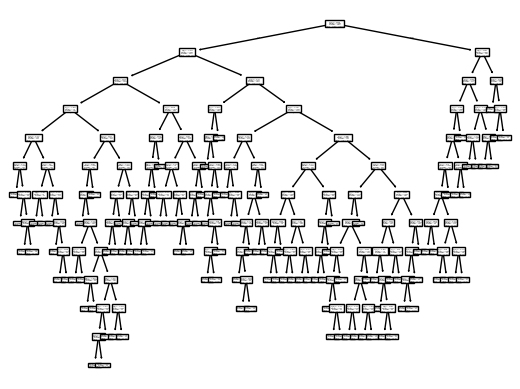

In [ ]:
### test approfondie du DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score




# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=[200, 300, 400,500, 600, 700, 800, 900, 1000,1100, 1200, 1300, 1400, 1500, 2000]

splitter_List=['best','random']
weights_List=['uniform','distance']
max_depth_List=[2,3, 4, 5, 6, 7, 8, 9, 10, 11,12, 20]

for k in max_depth_List:

    models["DecisionTreeClassifier_criterion=", k]= DecisionTreeClassifier(criterion='entropy', min_samples_split=6, min_samples_leaf=21, max_features=27, max_depth=k )
    
   # models["DecisionTreeClassifier_criterion=", k]= DecisionTreeClassifier(max_depth=k)



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)
    model.fit(X_train, y_train)
    plot_tree(model)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")




Notre meilleur modèle est DecisionTreeClassifier: DecisionTreeClassifier(criterion='entropy', min_samples_split=6, min_samples_leaf=21, max_features=27, max_depth=10 )
    

#### RandomForestClassifier

Les étapages de vérification des hyperparamètres seront similaires à celles DecisionTreeClassifier.

n_estimators:Le nombre d'arbres dans la forêt. généralement la le modèle est performant quand il y a plus d'arbre 

In [168]:
### test approfondie du RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']
estim_list=[ 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,1100, 1200]

splitter_List=['best','random']
weights_List=['uniform','distance']
list_simple=[1,2]

for k in estim_list:

    models["RandomForestClassifier=", k]= model = RandomForestClassifier(n_estimators=k)




# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

# RandomForestClassifier(n_estimators=1000)  avec un score de 0.6921
# compte tenu du temps d'exécution nous allons considéré juste 300 pour faire les autres test et finalement l' actualisé sur le dernier modèle     



Performances des modèles : {('RandomForestClassifier=', 100): np.float64(0.6832625996348022), ('RandomForestClassifier=', 200): np.float64(0.6814970615912901), ('RandomForestClassifier=', 300): np.float64(0.6776107590006295), ('RandomForestClassifier=', 400): np.float64(0.688910701042621), ('RandomForestClassifier=', 500): np.float64(0.6875010127071375), ('RandomForestClassifier=', 600): np.float64(0.6860844691233383), ('RandomForestClassifier=', 700): np.float64(0.6878518767800276), ('RandomForestClassifier=', 800): np.float64(0.6874978966851758), ('RandomForestClassifier=', 900): np.float64(0.6899757573491379), ('RandomForestClassifier=', 1000): np.float64(0.6920896666479706), ('RandomForestClassifier=', 1100): np.float64(0.6860875851453001), ('RandomForestClassifier=', 1200): np.float64(0.6878549928019893)}
🏆 Meilleur modèle : ('RandomForestClassifier=', 1000) avec un score de 0.6921


Criterion

In [171]:
### test approfondie du RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']
list_simple=[1,2]

for k in criterion_List:

    models["RandomForestClassifier=", k]= model = RandomForestClassifier(n_estimators=500, criterion=k)




# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

    
# RandomForestClassifier(n_estimators=500, criterion='log_loss')avec un score de 0.6924


Performances des modèles : {('RandomForestClassifier=', 'gini'): np.float64(0.6850287608827067), ('RandomForestClassifier=', 'entropy'): np.float64(0.6906806015168795), ('RandomForestClassifier=', 'log_loss'): np.float64(0.6924386611076835)}
🏆 Meilleur modèle : ('RandomForestClassifier=', 'log_loss') avec un score de 0.6924


min_samples_split

In [172]:
### test approfondie du RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']
list_simple=[1,2]

for k in min_samples_split_list:

    models["RandomForestClassifier=", k]= model = RandomForestClassifier(n_estimators=500, criterion='log_loss', min_samples_split=k)




# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")




Performances des modèles : {('RandomForestClassifier=', 2): np.float64(0.6917394257794729), ('RandomForestClassifier=', 3): np.float64(0.6913841992758365), ('RandomForestClassifier=', 4): np.float64(0.6871495254298552), ('RandomForestClassifier=', 5): np.float64(0.6903210125824967), ('RandomForestClassifier=', 6): np.float64(0.6913798368450901), ('RandomForestClassifier=', 7): np.float64(0.6857336050504483), ('RandomForestClassifier=', 8): np.float64(0.6899682788964296), ('RandomForestClassifier=', 9): np.float64(0.6878518767800276), ('RandomForestClassifier=', 10): np.float64(0.6874972734807835), ('RandomForestClassifier=', 11): np.float64(0.6867924293130419), ('RandomForestClassifier=', 12): np.float64(0.6913848224802288), ('RandomForestClassifier=', 13): np.float64(0.6889094546338362), ('RandomForestClassifier=', 14): np.float64(0.6903266214220277), ('RandomForestClassifier=', 15): np.float64(0.6903253750132431), ('RandomForestClassifier=', 16): np.float64(0.691386692093406), ('Rand

min_samples_leaf

In [173]:
### test approfondie du RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']
list_simple=[1,2]

for k in min_samples_split_list:

    models["RandomForestClassifier=", k]= model = RandomForestClassifier(n_estimators=500, criterion='log_loss',min_samples_split=9,min_samples_leaf=k )

    #models["DecisionTreeClassifier_criterion=", k]= DecisionTreeClassifier(criterion='entropy', min_samples_split=6, min_samples_leaf=20, max_features=21)



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")



    



Performances des modèles : {('RandomForestClassifier=', 2): np.float64(0.6927970036332816), ('RandomForestClassifier=', 3): np.float64(0.6885567209477692), ('RandomForestClassifier=', 4): np.float64(0.6882071032836639), ('RandomForestClassifier=', 5): np.float64(0.6885554745389845), ('RandomForestClassifier=', 6): np.float64(0.6882083496924486), ('RandomForestClassifier=', 7): np.float64(0.6871464094078935), ('RandomForestClassifier=', 8): np.float64(0.6878543695975969), ('RandomForestClassifier=', 9): np.float64(0.6867905596998647), ('RandomForestClassifier=', 10): np.float64(0.6878537463932045), ('RandomForestClassifier=', 11): np.float64(0.688910701042621), ('RandomForestClassifier=', 12): np.float64(0.6843226703061803), ('RandomForestClassifier=', 13): np.float64(0.6860907011672619), ('RandomForestClassifier=', 14): np.float64(0.6860882083496924), ('RandomForestClassifier=', 15): np.float64(0.6853814945687737), ('RandomForestClassifier=', 16): np.float64(0.6832632228391946), ('Rand

ccp_alpha,


Ce paramètre ccp_alpha  est utilisé pour la taille de l'élagage  dans un Random Forest. ce qui va permet d'agir sur la forme des arbres dans la forêt en supprimant les branches peu importantes, ce qui peut :
- Réduire le sur-apprentissage (overfitting).
- Améliorer la généralisation sur de nouvelles données.
- Diminuer la complexité du modèle (arbres plus petits, plus rapides).

Agit comme la régularisation dans les systèmes linéaires.


In [174]:
### test approfondie du RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]

list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']
list_simple=[1,2]

for k in k_List:

    models["RandomForestClassifier=", k]= model = RandomForestClassifier(n_estimators=500, criterion='log_loss',min_samples_split=6, min_samples_leaf=9, ccp_alpha=k )




# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")


#(n_estimators=500, criterion='log_loss',min_samples_split=6, min_samples_leaf=9, ccp_alpha=k )   avec un score de 0.6864




Performances des modèles : {('RandomForestClassifier=', 0.0): np.float64(0.6864415652401518), ('RandomForestClassifier=', 0.11): np.float64(0.5233047282517248), ('RandomForestClassifier=', 0.12): np.float64(0.5233047282517248), ('RandomForestClassifier=', 0.13): np.float64(0.5233047282517248), ('RandomForestClassifier=', 0.14): np.float64(0.5233047282517248), ('RandomForestClassifier=', 0.15): np.float64(0.5233047282517248), ('RandomForestClassifier=', 0.16): np.float64(0.5233047282517248), ('RandomForestClassifier=', 0.17): np.float64(0.5233047282517248), ('RandomForestClassifier=', 0.18): np.float64(0.5233047282517248), ('RandomForestClassifier=', 0.19): np.float64(0.5233047282517248), ('RandomForestClassifier=', 0.2): np.float64(0.5233047282517248)}
🏆 Meilleur modèle : ('RandomForestClassifier=', 0.0) avec un score de 0.6864


Notre modèle a moins performé donc nous allons retirer l'option de l'élagage. 

In [ ]:
### test approfondie du RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]

list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']
list_simple=[20000]

for k in list_simple:

    models["RandomForestClassifier=", k]= model = RandomForestClassifier(n_estimators=k, criterion='log_loss',min_samples_split=6, min_samples_leaf=9)




# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")


#RandomForestClassifier(n_estimators=k, criterion='log_loss',min_samples_split=6, min_samples_leaf=9) avec un score de 0.6900




Performances des modèles : {('RandomForestClassifier=', 20000): np.float64(0.689970771713999)}
🏆 Meilleur modèle : ('RandomForestClassifier=', 20000) avec un score de 0.6900


#### ExtraTreesClassifier

Sur ce modèle nous allons evaluer pratiquement les même paramètres sur le modèle précédent à base d'arbre. 

n_estimators

In [ ]:
### test approfondie du ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]

list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']
list_simple1=[2000,4000,5000]
list_simple2=[1,2,3]

for k in list_simple1:

    models["ExtraTreesClassifier=", k]= ExtraTreesClassifier(n_estimators=k)






# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")


#    ExtraTreesClassifier(n_estimators=2000)('ExtraTreesClassifier=', 2000) avec un score de 0.6847

Performances des modèles : {('ExtraTreesClassifier=', 2000): np.float64(0.684676650401032), ('ExtraTreesClassifier=', 4000): np.float64(0.6832619764304099), ('ExtraTreesClassifier=', 5000): np.float64(0.6829073731311659)}
🏆 Meilleur modèle : ('ExtraTreesClassifier=', 2000) avec un score de 0.6847


criterion

In [ ]:
### test approfondie du ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier





# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]

list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']
list_simple1=[200,300,500]
list_simple2=[1,2,3]

for k in criterion_List:

    models["ExtraTreesClassifier=", k]= ExtraTreesClassifier(n_estimators=2000, criterion=k)

    #models["RandomForestClassifier=", k]= model = RandomForestClassifier(n_estimators=k, criterion='log_loss',min_samples_split=6, min_samples_leaf=9)





# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")


#ExtraTreesClassifier(n_estimators=2000, criterion=log_loss) avec un score de 0.6854 



Performances des modèles : {('ExtraTreesClassifier=', 'gini'): np.float64(0.6853777553424196), ('ExtraTreesClassifier=', 'entropy'): np.float64(0.6829073731311658), ('ExtraTreesClassifier=', 'log_loss'): np.float64(0.6811418350876537)}
🏆 Meilleur modèle : ('ExtraTreesClassifier=', 'gini') avec un score de 0.6854


min_samples_split

In [ ]:
### test approfondie du ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier





# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]

list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']
list_simple1=[200,300,500]
list_simple2=[1,2,3]

for k in min_samples_split_list:

    models["ExtraTreesClassifier=", k]= ExtraTreesClassifier(n_estimators=2000, criterion='log_loss', min_samples_split=k)



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")


#ExtraTreesClassifier(n_estimators=2000, criterion='log_loss', min_samples_split=16)  avec un score de 0.6931


Performances des modèles : {('ExtraTreesClassifier=', 2): np.float64(0.6864396956269748), ('ExtraTreesClassifier=', 3): np.float64(0.6860863387365154), ('ExtraTreesClassifier=', 4): np.float64(0.6843195542842186), ('ExtraTreesClassifier=', 5): np.float64(0.6839637045761898), ('ExtraTreesClassifier=', 6): np.float64(0.6829055035179887), ('ExtraTreesClassifier=', 7): np.float64(0.6878487607580658), ('ExtraTreesClassifier=', 8): np.float64(0.686787443677903), ('ExtraTreesClassifier=', 9): np.float64(0.6857304890284867), ('ExtraTreesClassifier=', 10): np.float64(0.6903197661737119), ('ExtraTreesClassifier=', 11): np.float64(0.689618038027932), ('ExtraTreesClassifier=', 12): np.float64(0.6903222589912813), ('ExtraTreesClassifier=', 13): np.float64(0.6931459980929946), ('ExtraTreesClassifier=', 14): np.float64(0.6896174148235397), ('ExtraTreesClassifier=', 15): np.float64(0.6931466212973869), ('ExtraTreesClassifier=', 16): np.float64(0.6903216357868891), ('ExtraTreesClassifier=', 20): np.flo

min_samples_leaf

In [ ]:
### test approfondie du ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score





# Définir les modèles à tester
models = {}

k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
k_List=[0.0,0.11, 0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]

list_metric=['cityblock','cosine','euclidean', 'haversine','l1', 'l2', 'manhattan', 'nan_euclidean']

#list_noyau_SVC=['linear', 'poly', 'rbf', 'sigmoid']

n_neighbors_list=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
min_samples_split_list=[  2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
criterion_List=['gini','entropy','log_loss']

splitter_List=['best','random']
weights_List=['uniform','distance']
list_simple1=[200,300,500]
list_simple2=[1,2,3]

for k in min_samples_split_list:

    models["ExtraTreesClassifier=", k]= ExtraTreesClassifier(n_estimators=2000, criterion='log_loss', min_samples_split=16,min_samples_leaf=k)


# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")


#meme score, donc ce paramètre ne permet pas obligatoirement une bonne performance


Performances des modèles : {('ExtraTreesClassifier=', 2): np.float64(0.6913810832538748), ('ExtraTreesClassifier=', 3): np.float64(0.6924417771296453), ('ExtraTreesClassifier=', 4): np.float64(0.6864421884445442), ('ExtraTreesClassifier=', 5): np.float64(0.6906781086993101), ('ExtraTreesClassifier=', 6): np.float64(0.6920877970347935), ('ExtraTreesClassifier=', 7): np.float64(0.6899701485096067), ('ExtraTreesClassifier=', 8): np.float64(0.6931472445017792), ('ExtraTreesClassifier=', 9): np.float64(0.6889094546338363), ('ExtraTreesClassifier=', 10): np.float64(0.6903241286044584), ('ExtraTreesClassifier=', 11): np.float64(0.6896149220059703), ('ExtraTreesClassifier=', 12): np.float64(0.6889082082250516), ('ExtraTreesClassifier=', 13): np.float64(0.6882039872617022), ('ExtraTreesClassifier=', 14): np.float64(0.6874960270719989), ('ExtraTreesClassifier=', 15): np.float64(0.6850268912695296), ('ExtraTreesClassifier=', 16): np.float64(0.6867893132910801), ('ExtraTreesClassifier=', 20): np.f

#### modèle SGDClassifier

En faisant la même procéduire on remarque que le modèle avec les hyperparamètre suivants performe mieux: 



early_stopping: est  utiliser pour l'arrêt anticipé afin de mettre fin à l'entraînement lorsque le score de validation ne s'améliore pas. C'est une mnière de mieux gérer les ressources
    

n_iter_no_change: Nombre d'itérations sans amélioration à attendre avant d'arrêter l'ajustement. la modification de ce paramètre va permettre à notre modèle d'être soit moins patient ou très patient pour expérer une amélioration. La convergence du modèle est vérifiée par rapport à la perte d'apprentissage ou à la perte de validation


max_iter: Le nombre maximal de passages sur les données d'apprentissage.

Après plus étapes 
c
SGDClassifier(penalty='l1',loss='log_loss',max_iter=100000, early_stopping=True, n_iter_no_change=10000)
c'est ce modèle avec ces hyperparamètres qui performe mieux . 

Il reste à vérifier la réactivité du modèle par rapport à la régularisation avec Alpha



In [157]:

# ('Logistic Regression_saga_l1', 0.13) avec un score de 0.7122


import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC, LinearSVC

# Définir les modèles à tester
models = {}



k_List=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.0031,0.0032,0.0033,0.0034,0.0035,0.004,0.005]


k_List_simp=[1,2]


for k in k_List:

    
    models["SGDClassifier",k]=SGDClassifier(penalty='l1',alpha=k,loss='log_loss',max_iter=100000, early_stopping=True, n_iter_no_change=10000)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

# SGDClassifier(penalty='l1',alpha=0.0002,loss='log_loss',max_iter=100000, early_stopping=True, n_iter_no_change=10000) avec un score de 0.7126



Performances des modèles : {('SGDClassifier', 0.0001): np.float64(0.7101058824262594), ('SGDClassifier', 0.0002): np.float64(0.7108132194115704), ('SGDClassifier', 0.0003): np.float64(0.7090433189373119), ('SGDClassifier', 0.0004): np.float64(0.7097556415577617), ('SGDClassifier', 0.0005): np.float64(0.7108101033896087), ('SGDClassifier', 0.0006): np.float64(0.7097531487401924), ('SGDClassifier', 0.0007): np.float64(0.7132836016228243), ('SGDClassifier', 0.0008): np.float64(0.7146957827758771), ('SGDClassifier', 0.0009): np.float64(0.711163460280068), ('SGDClassifier', 0.001): np.float64(0.710456123294757), ('SGDClassifier', 0.002): np.float64(0.7111678227108145), ('SGDClassifier', 0.003): np.float64(0.7104611089298958), ('SGDClassifier', 0.0031): np.float64(0.7101040128130822), ('SGDClassifier', 0.0032): np.float64(0.7083372283607856), ('SGDClassifier', 0.0033): np.float64(0.7083415907915318), ('SGDClassifier', 0.0034): np.float64(0.7101083752438286), ('SGDClassifier', 0.0035): np.flo

In [ ]:

# ('Logistic Regression_saga_l1', 0.13) avec un score de 0.7122


import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC, LinearSVC

# Définir les modèles à tester
models = {}



for k in [1]:

    
    models["SGDClassifier",k]=SGDClassifier(penalty='l1',alpha=0.0131,loss='log_loss',max_iter=100000, early_stopping=True, n_iter_no_change=10000)
    



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

# SGDClassifier(penalty='l1',alpha=0.0002,loss='log_loss',max_iter=100000, early_stopping=True, n_iter_no_change=10000) avec un score de 0.7126

    # Après étude approfondie, k= 0.131 performe mieux 

Performances des modèles : {('SGDClassifier', 1): np.float64(0.7143442954985947)}
🏆 Meilleur modèle : ('SGDClassifier', 1) avec un score de 0.7143


In [158]:

# ('Logistic Regression_saga_l1', 0.13) avec un score de 0.7122


import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC, LinearSVC

# Définir les modèles à tester
models = {}
random_statte=[ 2, 3, 4,5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


entiers = pd.Series(range(1, 1001))

for k in entiers:

    
    #models["SGDClassifier",k]=SGDClassifier(penalty='l1',alpha=0.0131,loss='log_loss',max_iter=100, early_stopping=True, n_iter_no_change=10000, random_state=k)
    
    models["SGDClassifier",k]=SGDClassifier(penalty='l2',alpha= 0.0131,loss='log_loss',max_iter=1000, random_state=k)#---- meilleur score 1



# Tester chaque modèle avec cross-validation
results = {}
for name, model in models.items():

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = np.mean(scores)

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

# SGDClassifier(penalty='l1',alpha=0.0002,loss='log_loss',max_iter=100000, early_stopping=True, n_iter_no_change=10000) avec un score de 0.7126

    # Après étude approfondie, k= 0.131 performe mieux 

Performances des modèles : {('SGDClassifier', 1): np.float64(0.7065710671128811), ('SGDClassifier', 2): np.float64(0.703045599865388), ('SGDClassifier', 3): np.float64(0.7023320308361534), ('SGDClassifier', 4): np.float64(0.7041006849016271), ('SGDClassifier', 5): np.float64(0.7101083752438286), ('SGDClassifier', 6): np.float64(0.7055134892590722), ('SGDClassifier', 7): np.float64(0.7037429655804214), ('SGDClassifier', 8): np.float64(0.7048105147045076), ('SGDClassifier', 9): np.float64(0.7026916197705362), ('SGDClassifier', 10): np.float64(0.7115161939661352), ('SGDClassifier', 11): np.float64(0.7037454583979909), ('SGDClassifier', 12): np.float64(0.7051595091642205), ('SGDClassifier', 13): np.float64(0.7012756993911292), ('SGDClassifier', 14): np.float64(0.704454664996479), ('SGDClassifier', 15): np.float64(0.7044552882008712), ('SGDClassifier', 16): np.float64(0.7055166052810341), ('SGDClassifier', 17): np.float64(0.7037460816023831), ('SGDClassifier', 18): np.float64(0.704106916945

### 2 Evaluation groupée des modèles

Après cette première étape nous avons une idée de nos différents modèles qui performent mieux , nous allons maintenant les confrontés afin d'en extraire le meilleur 

#### Utilisation des métriques

Voici la liste de nos modèles qui performent un peu mieux 

In [ ]:
models = {}


models["model_comp_LogisticRegression"]=LogisticRegression( solver='saga', C=0.13, max_iter=1000, penalty='l1')
models["model_comp_RandomForestClassifier"]=RandomForestClassifier(n_estimators=5000, criterion='log_loss',min_samples_split=20, min_samples_leaf=2 )
models["model_comp_SGDClassifier"]=SGDClassifier(penalty='l2',alpha= 0.0131,loss='log_loss',max_iter=10000, random_state=22)#---- meilleur score 1
models["model_comp_LinearSVC"]=LinearSVC(penalty='l2',C=0.2,loss='hinge',dual='auto',max_iter=50000) #deuxième
models["model_comp_ExtraTreesClassifier"]= ExtraTreesClassifier(n_estimators=2000, criterion='log_loss', min_samples_split=16,min_samples_leaf=2)
models["model_comp_SVC"]=SVC(kernel='linear',C=0.28,probability=True)



In [192]:
models

{'model_comp_LogisticRegression': LogisticRegression(C=0.13, max_iter=1000, penalty='l1', solver='saga'),
 'model_comp_RandomForestClassifier': RandomForestClassifier(criterion='log_loss', min_samples_leaf=2,
                        min_samples_split=20, n_estimators=5000),
 'model_comp_SGDClassifier': SGDClassifier(alpha=0.0131, loss='log_loss', max_iter=10000, random_state=22),
 'model_comp_LinearSVC': LinearSVC(C=0.2, loss='hinge', max_iter=50000),
 'model_comp_ExtraTreesClassifier': ExtraTreesClassifier(criterion='log_loss', min_samples_leaf=2,
                      min_samples_split=16, n_estimators=2000),
 'model_comp_SVC': SVC(C=0.28, kernel='linear', probability=True)}

Pour chaque modèle nous allons calculer la précision, le rappell et le F1 score , ensuite nous allons voir celui qui a le meilleur résultat 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC, LinearSVC


from sklearn.metrics import root_mean_squared_error, r2_score,mean_absolute_error,recall_score,precision_score,f1_score


results = {}
for name, model in models.items():

    model.fit(X_train,y_train)

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    #results[name] = np.mean(scores)

    y_pred=model.predict(X_test)

    print(f"{name} ")

    print(f"R2 {r2_score(y_test,y_pred)}")
    print(f"rmse {root_mean_squared_error(y_test,y_pred)}")

    print(f"mea {mean_absolute_error(y_test,y_pred)}")
    print(f"rappel {recall_score(y_test,y_pred)}")
    print(f"précision {precision_score(y_test,y_pred)}")
    print(f"f1_score {f1_score(y_test,y_pred)}")
    print(f"  ")
    print(f"  ")

    results[name] = np.mean(f1_score(y_test,y_pred))

# Afficher les résultats
best_model = max(results, key=results.get)
print("Performances des modèles :", results)
print(f"🏆 Meilleur modèle : {best_model} avec un score de {results[best_model]:.4f}")

#🏆 Meilleur modèle : ('SGDClassifier', 1) avec un score de 0.7283


('SGDClassifier', 1) 
R2 -0.17491943230069018
rmse 0.5414071417350284
mea 0.2931216931216931
rappel 0.7388663967611336
précision 0.7115009746588694
f1_score 0.7249255213505462
  
  
Performances des modèles : {('SGDClassifier', 1): np.float64(0.7249255213505462)}
🏆 Meilleur modèle : ('SGDClassifier', 1) avec un score de 0.7249


####  Préparation du fichier de compétition. 

In [156]:
y_pred


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [157]:
y_pred

# Convertir les prédictions en DataFrame

df_result = pd.DataFrame({'id': competition['id'].values, 'target': y_pred})


# Sauvegarder en CSV
df_result.to_csv("predictions.csv", index=False)

print("Fichier CSV enregistré : predictions.csv")

Fichier CSV enregistré : predictions.csv


#### Résumé de nos meilleurs modèles. 

In [ ]:
#model_comp_LogisticRegression=LogisticRegression( solver='saga', C=0.13, max_iter=1000, penalty='l1')
#model_comp_SVC=SVC(kernel='linear',C=0.28,probability=True)
#model_comp_RandomForestClassifier=RandomForestClassifier(n_estimators=5000, criterion='log_loss',min_samples_split=20, min_samples_leaf=2 )
#model_comp_LinearSVC=LinearSVC(penalty='l2',C=0.2,loss='hinge',dual='auto',max_iter=50000) deuxième
#model_comp_SGDClassifier=SGDClassifier(penalty='l2',alpha= 0.0131,loss='log_loss',max_iter=10000, random_state=22)---- meilleur score 1
#model_comp_ExtraTreesClassifier= ExtraTreesClassifier(n_estimators=2000, criterion='log_loss', min_samples_split=16,min_samples_leaf=2)

In [ ]:
models = {}


models["model_comp_LogisticRegression"]=LogisticRegression( solver='saga', C=0.13, max_iter=1000, penalty='l1')
models["model_comp_RandomForestClassifier"]=RandomForestClassifier(n_estimators=5000, criterion='log_loss',min_samples_split=20, min_samples_leaf=2 )
models["model_comp_SGDClassifier"]=SGDClassifier(penalty='l2',alpha= 0.0131,loss='log_loss',max_iter=10000, random_state=22)#---- meilleur score 1
#models["model_comp_LinearSVC"]=LinearSVC(penalty='l2',C=0.2,loss='hinge',dual='auto',max_iter=50000) #deuxième
# désactivé par ne prend pas compte la fonction predict_proba. 

models["model_comp_ExtraTreesClassifier"]= ExtraTreesClassifier(n_estimators=2000, criterion='log_loss', min_samples_split=16,min_samples_leaf=2)
models["model_comp_SVC"]=SVC(kernel='linear',C=0.28,probability=True)

#### Evaluation par graphique ou représentation

##### Courbe ROC

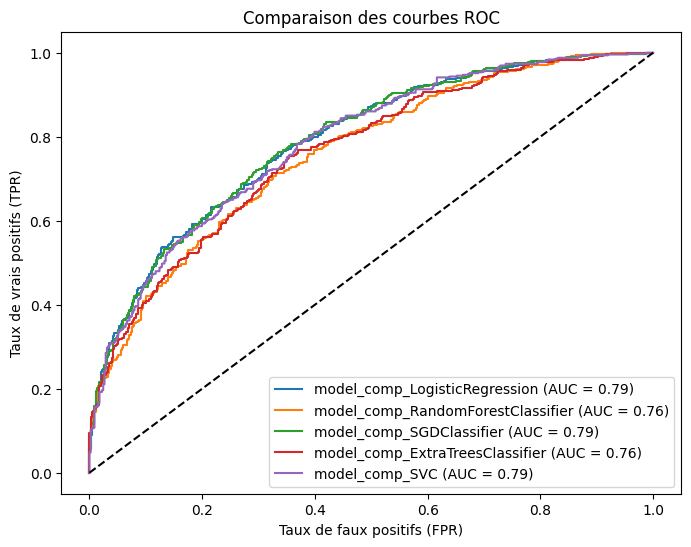

In [196]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt




plt.figure(figsize=(8, 6))

models # Tes modèles entraînés se trouve dans le dictionnaire

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive
    if(name=='model_comp_LinearSVC'):
        y_prob = model.decision_function(X_test)[:, 1]
        
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    roc_auc = auc(fpr, tpr)
    
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Courbe aléatoire (baseline)
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Comparaison des courbes ROC")
plt.legend()
plt.show()


Notons que : Plus une courbe est proche du coin supérieur gauche (TPR élevé et FPR faible), meilleur est le modèle.


Ici, les modèles LogisticRegression, SGDClassifier et SVC ont un AUC de 0.79, ce qui est légèrement mieux que RandomForestClassifier et ExtraTreesClassifier (AUC = 0.76).
Aucun modèle ne se démarque nettement, mais les modèles avec un AUC de 0.79 semblent légèrement plus performants.

In [190]:
models

{'model_comp_LogisticRegression': SGDClassifier(alpha=0.005, early_stopping=True, loss='log_loss',
               max_iter=100000, n_iter_no_change=10000, penalty='l1')}

In [ ]:
models = {}


models["model_comp_LogisticRegression"]=LogisticRegression( solver='saga', C=0.13, max_iter=1000, penalty='l1')
models["model_comp_RandomForestClassifier"]=RandomForestClassifier(n_estimators=5000, criterion='log_loss',min_samples_split=20, min_samples_leaf=2 )
models["model_comp_SGDClassifier"]=SGDClassifier(penalty='l2',alpha= 0.0131,loss='log_loss',max_iter=10000, random_state=22)#---- meilleur score 1
models["model_comp_LinearSVC"]=LinearSVC(penalty='l2',C=0.2,loss='hinge',dual='auto',max_iter=50000) #deuxième
models["model_comp_ExtraTreesClassifier"]= ExtraTreesClassifier(n_estimators=2000, criterion='log_loss', min_samples_split=16,min_samples_leaf=2)
models["model_comp_SVC"]=SVC(kernel='linear',C=0.28,probability=True)

##### Matrice de confusion

Pour chacun de nos meilleurs modèles nous allons créer des matrices de confusion pour voir la réaction des modèles. Si ils arrivent à récupérer tous les cas de chaque catégories (victoire ou défaite match null) et si ils arrivent à être précis dans les prédictions 

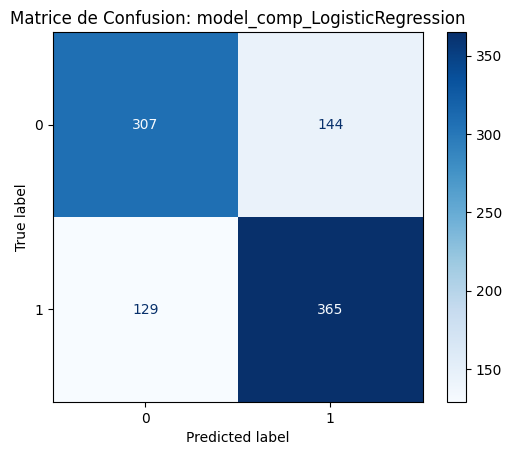

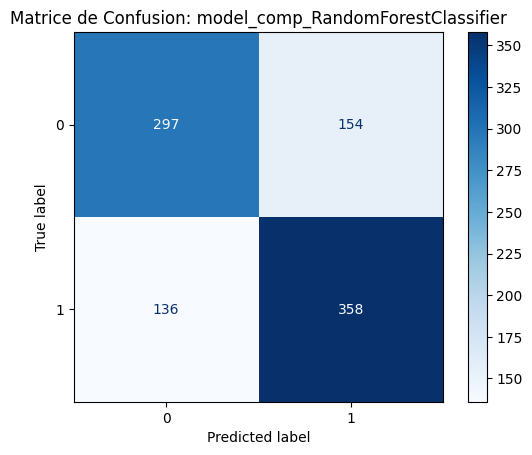

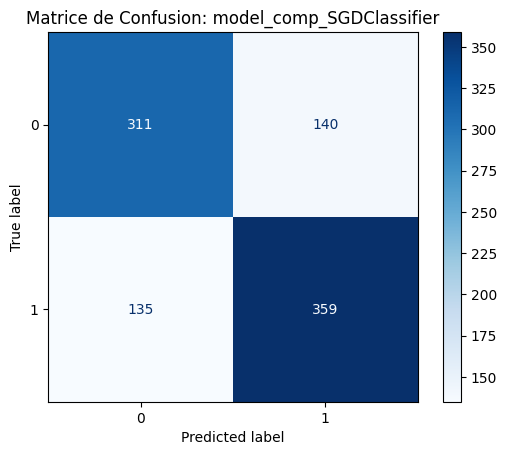

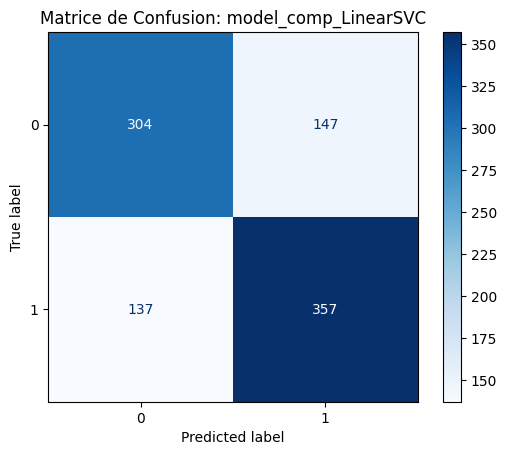

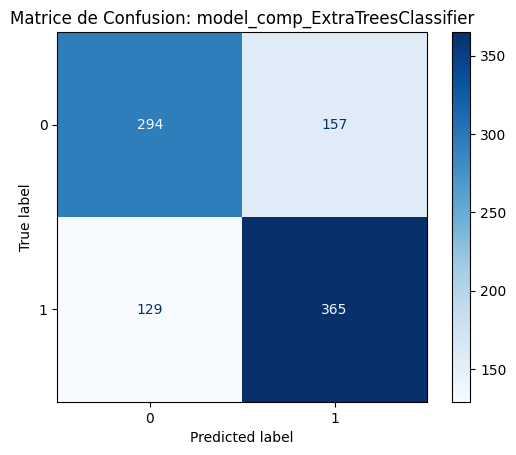

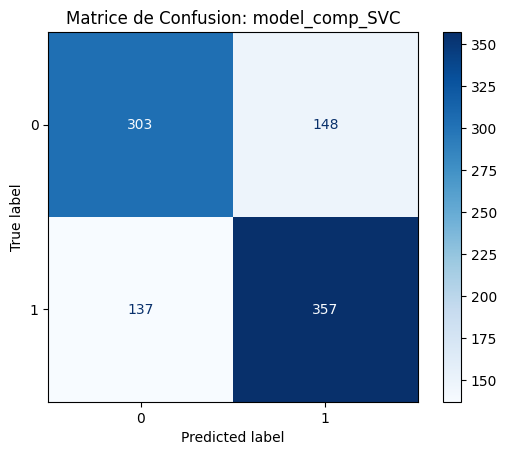

In [209]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  
import matplotlib.pyplot as plt  

# Prédictions sur l'ensemble de test  


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  

    # Création de la matrice de confusion  
    cm = confusion_matrix(y_test, y_pred)  

    # Affichage  
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Matrice de Confusion: "+ name)
    plt.show()
    print(" ")
    print(" ")


#### La courbe de précision et rappel precision_recall_curve

Pour chacun des modèles nous allons tracer la courbe de précision et de rappel, pour suivre la perfermance de nos modèles

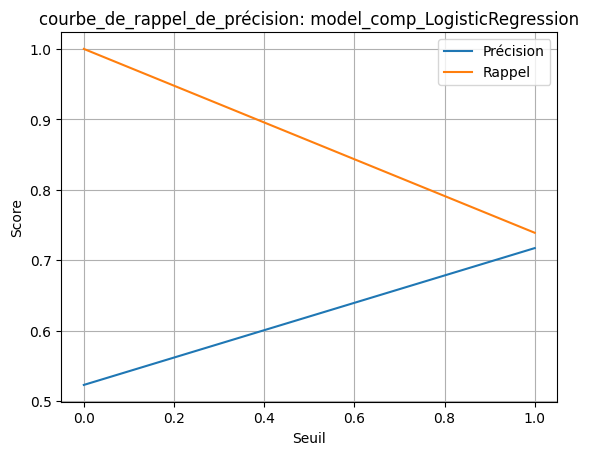

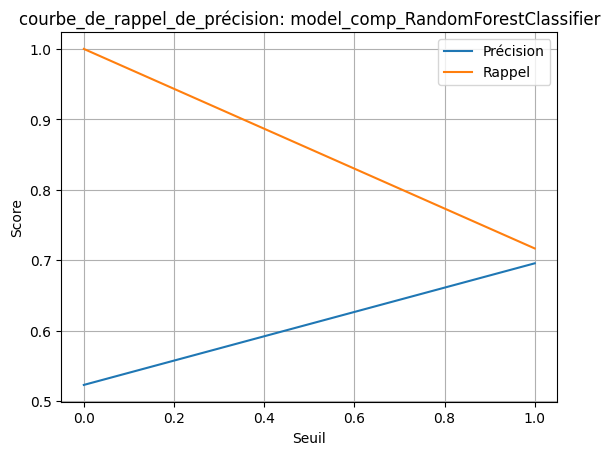

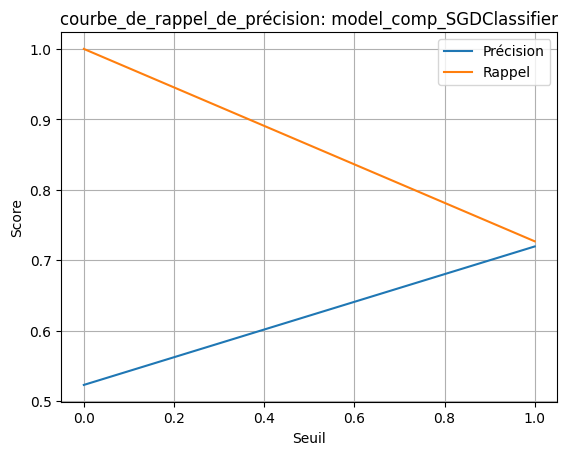

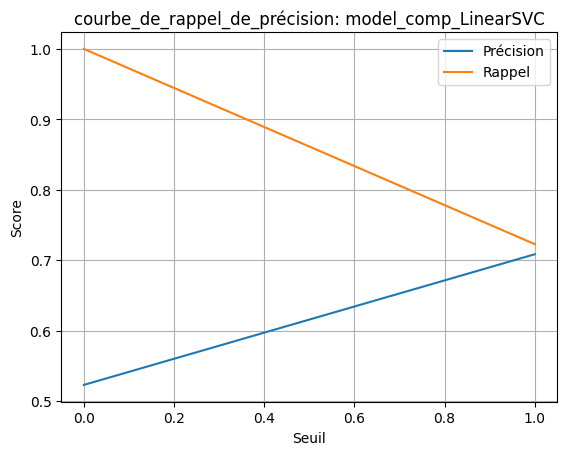

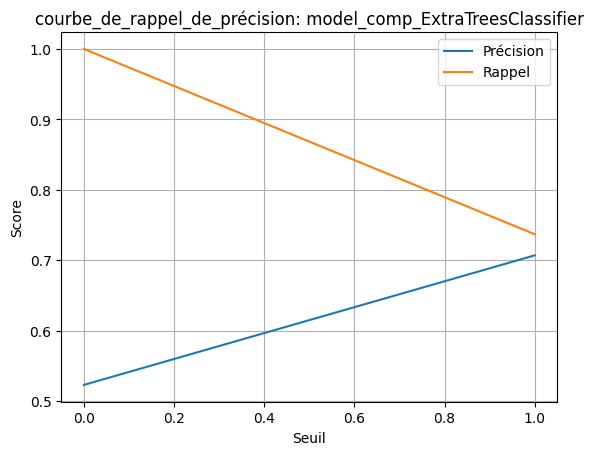

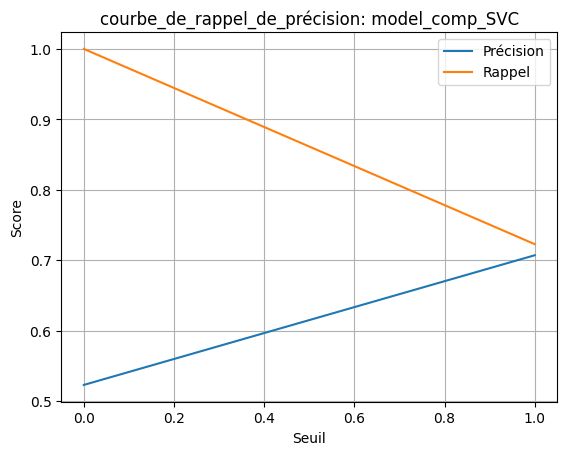

In [210]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

    plt.plot(thresholds, precisions[:-1], label="Précision")
    plt.plot(thresholds, recalls[:-1], label="Rappel")
    plt.xlabel("Seuil")
    plt.ylabel("Score")
    plt.title("courbe_de_rappel_de_précision: "+name)

    plt.grid()
    plt.legend()
    plt.show()
    print(" ")
    print(" ")

# Discussion finale

**Discussion des performances obtenues, est-ce que les performances obtenues ont été satisfaisantes** ? 

Les performances n'ont pas été très satisfaisante car arrivé à certains niveau il devenait comme impossible de dépasser la barre de 0.75 comme score f1 pour tous les modèles.


**Est-ce que vous avez remarqué des différences entre les différentes métriques ? Pourquoi selon-vous ?**


Oui il y a une différence. cela dépend surtout des algorithmes  utilisés dans les  modèles 

Prenons l'exemple de KNeighborsClassifier le changement du métrique par défaut (minkowski) en manhattan a provoqué un 

changement au niveau du score à la baisse. En effet vu la repartition de notre jeu de donnée en fonctiondu target , le 

modèle, en utilisant le métrique minkowski qui est en réalité 

une  généralisation du calcul des distances de Manhattan (L1) et Euclidienne (L2) arrivait à mieux choisir les voisins 

plus proches pour prendre un décision. Alors qu''avec le metric Manhattan, qui est une mesure de distance qui consiste à 

additionner les valeurs absolues des différences entre les coordonnées, le modèle tombe plus souvent dans l'erreur en 

utilisant cette méthode pour calculer la distance donc celà impacte sa performance

En poussant plus les études on remarque que c'est le metric 'correlation' qui permet à notre modèle de mieux performer. 



**Discussion sur le meilleur et le pire modèle obtenu, pourquoi selon-vous ?**


le meilleur modèle  est : model_comp_SGDClassifier à partir de SGDClassifier

Le modèle le moins performant est : model_KNeighborsClassifier_minkowski à partir de KNeighborsClassifier



**Conclusions finales, quelles sont les limitations de votre modèle ? Qu’est-ce qu’on pourrait faire pour améliorer les performances comme travail futur ?**

les limites de notre modèle:

- un score acceptable mais pas meilleur malgré les différentes modifications ou changement des hyperparamètres

- Des correlations  moins élévées voire très faible entre les caractéristiques et le target. Certaines même sont contraire à la réalité

- Présence de plusieurs valeurs abérantes dont leur gestion peut soit engendrer la réduction de la quantité de notre jeu de donnée ou soit toucher l'intégrer des resultats du jeu de donnée. 

- Un jeu de donnée pas très volumineux pour favoriser une meilleur entrainement 

- limitation des ressources surtout matériels pour l'utilisation des modeles à base de Forêts d'arbre 



**Pour le futur**

Utiliser des modèles basés sur des ensembles des ensembles des ensembles... c'est à dire un récursivité d'ensemble de modèle

Dans la mésude du possible avoir un dataframe très volumineux pour faciliter la gestion des valeurs abérantes sans perdre une grande portion de données

Dans la mésude du possible avoir un dataframe avec des caractéristiques ayant un corrélation un peu plus prononcée avec le Target

Fait l'entrainement des modèles avec des ressources matérielles plus performantes




In [ ]:
# Augmenter la largeur d'affichage pour voir toutes les colonnes
pd.set_option('display.max_columns', None)

# Augmenter le nombre de lignes affichées
pd.set_option('display.max_rows', None)

# Désactiver la coupure du texte
pd.set_option('display.max_colwidth', None)

## **Conclusion** 

Ce projet nous a donc permis l'application des concepts de bases du machine Learning. C'était une parfaite occasion de nous lancer 

vers une auto conception des modèles grâce au développement des réflexes comme les anticipations, la gestion des erreurs et 

L’amélioration des techniques de recherche via les plusieurs sources comme des documentations sur différentes fonctions et modules.

Nous remercions sincèrement l'Enseignant de nous avoir offrir cette opportunité et surtout pour le temps et l'énergie fou qu'il a fallu sacrifier pour la préparation de ce projet. 


#### Un sincère Merci à M. Jean Gabriel Gaudreault